In [ ]:
# Goal is to add Itaconate Pathway in Yeast
# Compare Yeast and Ustilago Model
# Transporter Mtta 1/2? apparently another one 
# Genome Annotation of Ustilago 

In [ ]:
#From fluxer- potential knockout->itaconate-CoA ligase but need to transport itaconate from mitochondria to cytoplasm and then outside the cell 
# Add Mtt1- Cis Aconitate MAlate Shuttle (UMAG_02365 or UMAG_05079 or UMAG_02806)/ MttA- present in U.maydis strain in lab (need to check gene to add and model)
#Cis acoitate to trans aconitate(cytoplasm): UMAG_11778
#trans-aconitate to itaconate : UMAG_05076
#itaconate transporter (cytoplasm to extracellular space): UMAG_11777
# reaction (r_1008) from cis-aconitate to trans-acontitate in mitochondria- but it seems trans-aconitate is deadend/ reveresible reaction- simulate knocking this out - but current flux is 0
# cis aconitate(3-) to isocitrate reaction can be knocked out so all cis-aconitate in mitochondria is converted to cis-aconitate in cytoplasm 
# and consequently trans-acontinate to itaconate converting enzyme can be cloned in 


# Libraries

In [1]:
from pathlib import Path
from cobra.io import read_sbml_model, write_sbml_model
import pandas as pd
import numpy as np
import cobra
from cobra.flux_analysis import flux_variability_analysis
from cobra.io import load_model
from cobra import Model, Reaction, Metabolite
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)
#!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Anand\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Load Models

In [3]:
from cobra import Configuration

config = Configuration()
print("Default solver:", config.solver)

# Change solver if needed
config.solver = "glpk"


Default solver: <module 'optlang.glpk_interface' from 'C:\\Users\\Anand\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\optlang\\glpk_interface.py'>


In [3]:
# Load Ustilago Model
iUma22 = Path("C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/iUma22_transporter.sbml")
iUma22 = iUma22.resolve()
iUma22= read_sbml_model(str(iUma22))
write_sbml_model(iUma22, "iUma22_transporter.sbml")

In [52]:
# Load Ustilago Model
iUma22_cp = Path("C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/iUma22.xml")
iUma22_cp = iUma22_cp.resolve()
iUma22_cp= read_sbml_model(str(iUma22_cp))
write_sbml_model(iUma22_cp, "iUma22.xml")

In [12]:
#Load Yeast Model
yeast8 = Path("C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/yeast9_itaconic.sbml")
yeast8 = yeast8.resolve()
yeast8_model_cp= read_sbml_model(str(yeast8))
#write_sbml_model(yeast8_model_cp, "yeast9_itaconic.sbml")

In [13]:
#Load Yeast Model
yeast8 = Path("C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/yeast-GEM.xml")
yeast8 = yeast8.resolve()
yeast8= read_sbml_model(str(yeast8))
write_sbml_model(yeast8, "yeast-GEM.xml")

In [143]:
reaction=yeast8_model_cp.reactions.get_by_id('r_0302')
reaction.bounds=0.0,0.0
reaction

Reaction identifier,r_0302
Name,citrate to cis-aconitate(3-)
Memory address,0x25c3b5d4230
Stoichiometry,s_0524 --> s_0517 + s_0807 citrate --> cis-aconitate + H2O
GPR,YLR304C
Lower bound,0.0
Upper bound,0.0


In [61]:
iUma22.reactions.get_by_id('ACONTa')

Reaction identifier,ACONTa
Name,ACONITATEDEHYDR-RXN
Memory address,0x25c26524b30
Stoichiometry,cit_m <=> acon_C_m + h2o_m citrate <=> cis-aconitate + H2O
GPR,UMAG_02899 or UMAG_11923
Lower bound,-1000.0
Upper bound,1000.0


In [142]:
reaction= yeast8_model_cp.reactions.get_by_id('r_4785')
reaction.bounds=0.0,1000.0
reaction

Reaction identifier,r_4785
Name,Citrate_Cis_Aconitate_Convertase
Memory address,0x25c30eb9910
Stoichiometry,s_0524 --> s_0517 + s_0807 citrate --> cis-aconitate + H2O
GPR,
Lower bound,0.0
Upper bound,1000.0


In [136]:
reaction= yeast8_model_cp.reactions.get_by_id('r_4785')
reaction.bounds=0.0,1000.0
reaction

Reaction identifier,r_4785
Name,Citrate_Cis_Aconitate_Convertase
Memory address,0x25c4282b7d0
Stoichiometry,s_0524 --> s_0517 + s_0807 citrate --> cis-aconitate + H2O
GPR,
Lower bound,0.0
Upper bound,1000.0


In [ ]:
#yeast8_model_cp.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
s_0420,r_1654,0.5477,0,0.00%
s_0565,r_1714,1,6,100.00%
s_0796,r_1832,0.02444,0,0.00%
s_0925,r_1861,2.697E-06,0,0.00%
s_1277,r_1992,2.324,0,0.00%
s_1324,r_2005,0.426,0,0.00%
s_1374,r_2020,0.0003118,0,0.00%
s_1438,r_2049,0.0003411,0,0.00%
s_1468,r_2060,0.007389,0,0.00%
s_4200,r_4593,0.0001108,0,0.00%


In [63]:
# Assuming the model is already loaded
for reaction in yeast8_model_cp.reactions:
    print(reaction.id)


r_0001
r_0002
r_0003
r_0004
r_0005
r_0006
r_0007
r_0012
r_0013
r_0014
r_0015
r_0016
r_0017
r_0018
r_0019
r_0020
r_0021
r_0022
r_0023
r_0024
r_0025
r_0026
r_0027
r_0028
r_0029
r_0030
r_0032
r_0033
r_0034
r_0035
r_0036
r_0037
r_0038
r_0039
r_0040
r_0041
r_0042
r_0043
r_0044
r_0045
r_0057
r_0058
r_0059
r_0060
r_0061
r_0062
r_0063
r_0064
r_0065
r_0066
r_0067
r_0068
r_0069
r_0070
r_0072
r_0073
r_0074
r_0075
r_0076
r_0077
r_0078
r_0079
r_0080
r_0081
r_0082
r_0083
r_0084
r_0085
r_0086
r_0087
r_0088
r_0089
r_0090
r_0091
r_0092
r_0093
r_0094
r_0095
r_0096
r_0097
r_0099
r_0100
r_0101
r_0102
r_0103
r_0104
r_0105
r_0106
r_0107
r_0108
r_0109
r_0111
r_0112
r_0113
r_0114
r_0115
r_0116
r_0117
r_0118
r_0119
r_0120
r_0121
r_0122
r_0123
r_0124
r_0125
r_0126
r_0127
r_0128
r_0129
r_0130
r_0131
r_0132
r_0133
r_0134
r_0135
r_0137
r_0138
r_0139
r_0140
r_0142
r_0143
r_0144
r_0145
r_0146
r_0147
r_0148
r_0149
r_0150
r_0151
r_0152
r_0153
r_0154
r_0155
r_0156
r_0157
r_0158
r_0159
r_0160
r_0161
r_0162
r_0163
r_0164

In [43]:
for gene in list(yeast8_model_cp.genes):
    print(f"Gene ID: {gene.id}, Gene Name: {gene.name}")

Gene ID: Q0045, Gene Name: G_Q0045
Gene ID: Q0080, Gene Name: G_Q0080
Gene ID: Q0085, Gene Name: G_Q0085
Gene ID: Q0105, Gene Name: G_Q0105
Gene ID: Q0130, Gene Name: G_Q0130
Gene ID: Q0250, Gene Name: G_Q0250
Gene ID: Q0275, Gene Name: G_Q0275
Gene ID: YAL012W, Gene Name: G_YAL012W
Gene ID: YAL022C, Gene Name: G_YAL022C
Gene ID: YAL023C, Gene Name: G_YAL023C
Gene ID: YAL026C, Gene Name: G_YAL026C
Gene ID: YAL035W, Gene Name: G_YAL035W
Gene ID: YAL038W, Gene Name: G_YAL038W
Gene ID: YAL039C, Gene Name: G_YAL039C
Gene ID: YAL044C, Gene Name: G_YAL044C
Gene ID: YAL054C, Gene Name: G_YAL054C
Gene ID: YAL060W, Gene Name: G_YAL060W
Gene ID: YAL061W, Gene Name: G_YAL061W
Gene ID: YAL062W, Gene Name: G_YAL062W
Gene ID: YAR015W, Gene Name: G_YAR015W
Gene ID: YAR035W, Gene Name: G_YAR035W
Gene ID: YAR071W, Gene Name: G_YAR071W
Gene ID: YBL011W, Gene Name: G_YBL011W
Gene ID: YBL013W, Gene Name: G_YBL013W
Gene ID: YBL015W, Gene Name: G_YBL015W
Gene ID: YBL030C, Gene Name: G_YBL030C
Gene ID: YBL03

# Find Metabolites/ Reactions and Associated information from iUma22

## Itaconate

In [5]:

summary = iUma22.metabolites.get_by_id('itacon_c').summary()
print (summary)
iUma22.metabolites.get_by_id("itacon_c")


itacon_c
Formula: C5H4O4

Producing Reactions
-------------------
Empty DataFrame
Columns: [Percent, Flux, Reaction, Definition]
Index: []

Consuming Reactions
-------------------
Empty DataFrame
Columns: [Percent, Flux, Reaction, Definition]
Index: []


Metabolite identifier,itacon_c
Name,itaconate
Memory address,0x1de91e25ca0
Formula,C5H4O4
Compartment,c
In 3 reaction(s),"Putative_Itaconate_Transporter, Putative_Trans_Aconitate_Decarboxylase, IMO"


In [6]:
summary = iUma22.metabolites.get_by_id('itacon_e').summary()
print(summary)
iUma22.metabolites.get_by_id('itacon_e')

itacon_e
Formula: C5H4O4

Producing Reactions
-------------------
Empty DataFrame
Columns: [Percent, Flux, Reaction, Definition]
Index: []

Consuming Reactions
-------------------
Empty DataFrame
Columns: [Percent, Flux, Reaction, Definition]
Index: []


Metabolite identifier,itacon_e
Name,itaconate
Memory address,0x1de91e25dc0
Formula,C5H4O4
Compartment,e
In 2 reaction(s),"Putative_Itaconate_Transporter, EX_itacon_e"


In [7]:
gene_UMAG_11777 = iUma22.genes.get_by_id('UMAG_11777')
associated_reactions = gene_UMAG_11777.reactions
associated_reactions

frozenset({<Reaction Putative_Itaconate_Transporter at 0x1de92dc6e10>})

In [ ]:
rxn_ID= 'Putative_Trans_Aconitate_Decarboxylase'
reaction = iUma22.reactions.get_by_id(rxn_ID)
reaction.subsystem
#checked all reactions we want to add, none of them belong to a subsystem

''

In [24]:
iUma22.reactions.get_by_id('Putative_Itaconate_Transporter')
#iUma22.summary()

Reaction identifier,Putative_Itaconate_Transporter
Name,itp1 Putative Major Facilitator Superfamily extracellular itaconate transporter
Memory address,0x23d9565af00
Stoichiometry,itacon_c --> itacon_e itaconate --> itaconate
GPR,UMAG_11777
Lower bound,0.0
Upper bound,1000.0


In [8]:
summary = iUma22.metabolites.get_by_id('itacon_e').summary()
print(summary)
iUma22.metabolites.get_by_id('itacon_e')

itacon_e
Formula: C5H4O4

Producing Reactions
-------------------
Empty DataFrame
Columns: [Percent, Flux, Reaction, Definition]
Index: []

Consuming Reactions
-------------------
Empty DataFrame
Columns: [Percent, Flux, Reaction, Definition]
Index: []


Metabolite identifier,itacon_e
Name,itaconate
Memory address,0x1de91e25dc0
Formula,C5H4O4
Compartment,e
In 2 reaction(s),"Putative_Itaconate_Transporter, EX_itacon_e"


## Cis-aconitate

In [9]:
aconitate_reaction= [reaction for reaction in iUma22.reactions if 'aconitate' in reaction.id.lower()]
aconitate_rxn_id= aconitate_reaction[0].id if aconitate_reaction else None
print (aconitate_rxn_id)

HOMOACONITATE-HYDRATASE-RXN


In [10]:
gene_UMAG_02365 = iUma22.genes.get_by_id('UMAG_02365')
associated_reactions = gene_UMAG_02365.reactions
associated_reactions

frozenset({<Reaction TRANS_Cis_Aconitate_Malate_Shuttle at 0x1de92d87e00>,
           <Reaction TRANS_Citrate_Malate_Shuttle at 0x1de92d87590>,
           <Reaction TRANS_Isocitrate_Malate_Shuttle at 0x1de92dc4560>})

In [11]:
gene_UMAG_11778 = iUma22.genes.get_by_id('UMAG_11778')
associated_reactions = gene_UMAG_11778.reactions
associated_reactions

frozenset({<Reaction Putative_Aconitate_Delta_Isomerase at 0x1de92dc6c30>})

In [12]:
cis_trans_aco=iUma22.reactions.get_by_id('Putative_Aconitate_Delta_Isomerase')
cis_trans_aco

Reaction identifier,Putative_Aconitate_Delta_Isomerase
Name,adi1 Putative Aconitate Delta-Isomerase
Memory address,0x1de92dc6c30
Stoichiometry,acon_C_c <=> acon_T_c cis-aconitate <=> trans-aconitate
GPR,UMAG_11778
Lower bound,-1000.0
Upper bound,1000.0


In [13]:
gene_UMAG_05079 = iUma22.genes.get_by_id('UMAG_05079')
associated_reactions = gene_UMAG_05079.reactions
associated_reactions

frozenset({<Reaction TRANS_Cis_Aconitate_Malate_Shuttle at 0x1de92d87e00>,
           <Reaction TRANS_Citrate_Malate_Shuttle at 0x1de92d87590>,
           <Reaction TRANS_Isocitrate_Malate_Shuttle at 0x1de92dc4560>})

In [14]:
aconitate_exchange_1= iUma22.reactions.get_by_id('TRANS_Cis_Aconitate_Malate_Shuttle')
aconitate_exchange_1

Reaction identifier,TRANS_Cis_Aconitate_Malate_Shuttle
Name,Cis Aconitate Malate Shuttle
Memory address,0x1de92d87e00
Stoichiometry,acon_C_m + mal__L_c <=> acon_C_c + mal__L_m cis-aconitate + (S)-malate <=> cis-aconitate + (S)-malate
GPR,UMAG_02365 or UMAG_05079 or UMAG_02806
Lower bound,-1000.0
Upper bound,1000.0


In [15]:
aconitate_exchange_2= iUma22.reactions.get_by_id('TRANS_Citrate_Malate_Shuttle')
aconitate_exchange_2

Reaction identifier,TRANS_Citrate_Malate_Shuttle
Name,Citrate Malate Shuttle
Memory address,0x1de92d87590
Stoichiometry,cit_m + mal__L_c <=> cit_c + mal__L_m citrate + (S)-malate <=> citrate + (S)-malate
GPR,UMAG_02365 or UMAG_05079 or UMAG_02806
Lower bound,-1000.0
Upper bound,1000.0


In [16]:
aconitate_exchange_3=iUma22.reactions.get_by_id('TRANS_Isocitrate_Malate_Shuttle')
aconitate_exchange_3

Reaction identifier,TRANS_Isocitrate_Malate_Shuttle
Name,Isocitrate Malate Shuttle
Memory address,0x1de92dc4560
Stoichiometry,icit_m + mal__L_c <=> icit_c + mal__L_m D-threo-isocitrate + (S)-malate <=> D-threo-isocitrate + (S)-malate
GPR,UMAG_02365 or UMAG_05079 or UMAG_02806
Lower bound,-1000.0
Upper bound,1000.0


In [17]:
aconitate_reaction= [reaction for reaction in iUma22.reactions if 'aconitate' in reaction.id.lower()]
aconitate_rxn_id= aconitate_reaction[0].id if aconitate_reaction else None
print (aconitate_rxn_id)

HOMOACONITATE-HYDRATASE-RXN


In [18]:
summary = iUma22.metabolites.get_by_id('hacon_T_c').summary()
print(summary)
iUma22.metabolites.get_by_id('hacon_T_c')

hacon_T_c
Formula: C7H5O6

Producing Reactions
-------------------
Percent    Flux   Reaction                       Definition
100.00% 0.02063 RXN3O-1983 HOMO-CIT_c --> h2o_c + hacon_T_c

Consuming Reactions
-------------------
Percent     Flux                    Reaction                    Definition
100.00% -0.02063 HOMOACONITATE-HYDRATASE-RXN h2o_c + hacon_T_c --> hicit_c


Metabolite identifier,hacon_T_c
Name,cis-homoaconitate
Memory address,0x1de8b377ec0
Formula,C7H5O6
Compartment,c
In 4 reaction(s),"RXN3O-1983, TRANS-RXNTFS-7-HOMO-CIS-ACONITATE1008, TRANS-RXNTFS-1-HOMO-CIS-ACONITATE1213, HOMOACONITATE-HYDRATASE-RXN"


In [93]:
summary = iUma22.metabolites.get_by_id('h_c').summary()
print(summary)
iUma22.metabolites.get_by_id('h_c')

h_c
===
Formula: H

Producing Reactions
-------------------
Percent  Flux                                            Reaction                                                        Definition
  5.53%  1.76                                              ACALDh                acald_c + coa_c + nad_c --> accoa_c + h_c + nadh_c
 10.14% 3.227                                               ALCD1                          meoh_c + nad_c --> fald_c + h_c + nadh_c
 22.12%  7.04 ALDEHYDE-DEHYDROGENASE-NADP+-RXN-SALICYLALDEHYDE188 SALICYLALDEHYDE_c + h2o_c + nadp_c --> 2.0 h_c + nadph_c + salc_c
 13.82%   4.4                                                GAPD                   g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
  8.29%  2.64                                              HCO3En                                    co2_c + h2o_c --> h_c + hco3_c
  6.91%   2.2                                                HEX1                          atp_c + glc__D_c --> adp_c + g6p_c + h_c
  5.53%  1.76   

Metabolite identifier,h_c
Name,H+
Memory address,0x1de9c1cf4a0
Formula,H
Compartment,c
In 779 reaction(s),"RXN66-311-CPD-45751384, 3OAR180, RXN3O-227, MAN1PT2, TRANS-RXNTFS-33-HIS1319, 3OAS120, TRANS-RXNTFS-33-CYS1335, PGLYDH, GLUCONATE-5-DEHYDROGENASE-RXN-GLUCONATE467, HACD3m, MERGTROLR, TRANS-..."


In [27]:
iUma22.reactions.get_by_id('HOMOACONITATE-HYDRATASE-RXN')
#iUma22.summary()

Reaction identifier,HOMOACONITATE-HYDRATASE-RXN
Name,HOMOACONITATE-HYDRATASE-RXN
Memory address,0x23d9b8929c0
Stoichiometry,"h2o_c + hacon_T_c --> hicit_c H2O + cis-homoaconitate --> (1R,2S)-homoisocitrate"
GPR,UMAG_11923 or UMAG_02899 or UMAG_10689
Lower bound,0.0
Upper bound,1000.0


## Trans-aconitate

In [19]:
gene_UMAG_05076 = iUma22.genes.get_by_id('UMAG_05076')
associated_reactions = gene_UMAG_05076.reactions
associated_reactions

frozenset({<Reaction Putative_Trans_Aconitate_Decarboxylase at 0x1de92dc70b0>})

In [20]:
itaconate_cis_aconitate=iUma22.reactions.get_by_id('Putative_Trans_Aconitate_Decarboxylase')
itaconate_cis_aconitate

Reaction identifier,Putative_Trans_Aconitate_Decarboxylase
Name,tad1 Putative Trans-Aconitate Decarboxylase
Memory address,0x1de92dc70b0
Stoichiometry,acon_T_c + h_c --> co2_c + itacon_c trans-aconitate + H+ --> CO2 + itaconate
GPR,UMAG_05076
Lower bound,0.0
Upper bound,1000.0


In [ ]:
Mtt1_reaction= [reaction for reaction in iUma22.reactions if 'aconitate' in reaction.id.lower()]
Mtt1_id= Mtt1_reaction[0].id if Mtt1_reaction else None

## Metabolites: itacon_c, itacon_e, acon_C_c, acon_T_c, acon_C_m

In [26]:
itaconate_id = 'Putative_Itaconate_Transporter'
iUma22.objective=itaconate_id
iUma22.optimize()

,fluxes,reduced_costs
ANTPPT,0.0,-1.387779e-16
ATNS,0.0,-2.400000e+00
TRANS-RXNTFS-55-CPD-125752,0.0,-2.220446e-16
TRANS-RXNTFS-55-DTDP-D-GLUCOSE3,0.0,0.000000e+00
TRANS-RXNTFS-55-ADP-D-GLUCOSE4,0.0,0.000000e+00
...,...,...
EX_succam_e,0.0,-1.600000e+00
LALAAMIDDEAM,0.0,0.000000e+00
Trans_alaam__L_c,0.0,-0.000000e+00
EX_alaam__L_e,0.0,-1.200000e+00


In [27]:
summary_itacon_c = iUma22.metabolites.get_by_id('itacon_c').summary()
summary_itacon_c

Percent,Flux,Reaction,Definition
100.00%,2.64,Putative_Trans_Aconitate_Decarboxylase,acon_T_c + h_c --> co2_c + itacon_c
Percent,Flux,Reaction,Definition
100.00%,-2.64,Putative_Itaconate_Transporter,itacon_c --> itacon_e


In [29]:
iUma22.metabolites.get_by_id('itacon_c')

Metabolite identifier,itacon_c
Name,itaconate
Memory address,0x1de9c6dc4a0
Formula,C5H4O4
Compartment,c
In 3 reaction(s),"IMO, Putative_Itaconate_Transporter, Putative_Trans_Aconitate_Decarboxylase"


In [31]:
iUma22.metabolites.get_by_id('itacon_e')

Metabolite identifier,itacon_e
Name,itaconate
Memory address,0x1de9c6df380
Formula,C5H4O4
Compartment,e
In 2 reaction(s),"EX_itacon_e, Putative_Itaconate_Transporter"


In [38]:
summary_itacon_e = iUma22.metabolites.get_by_id('itacon_e').summary()
summary_itacon_e

Percent,Flux,Reaction,Definition
100.00%,2.64,Putative_Itaconate_Transporter,itacon_c --> itacon_e
Percent,Flux,Reaction,Definition
100.00%,-2.64,EX_itacon_e,itacon_e -->


In [44]:
iUma22.metabolites.get_by_id('acon_T_c')

Metabolite identifier,acon_T_c
Name,trans-aconitate
Memory address,0x1de9c3e4c50
Formula,C6H3O6
Compartment,c
In 4 reaction(s),"TRANS-RXNTFS-1-CPD-2251215, TRANS-RXNTFS-7-CPD-2251010, Putative_Trans_Aconitate_Decarboxylase, Putative_Aconitate_Delta_Isomerase"


In [ ]:
summary_acon_C_c = iUma22.metabolites.get_by_id('acon_C_c').summary()
summary_acon_C_c

Percent,Flux,Reaction,Definition
100.00%,2.64,TRANS_Cis_Aconitate_Malate_Shuttle,acon_C_m + mal__L_c <=> acon_C_c + mal__L_m
Percent,Flux,Reaction,Definition
100.00%,-2.64,Putative_Aconitate_Delta_Isomerase,acon_C_c <=> acon_T_c


In [34]:
iUma22.metabolites.get_by_id('acon_C_m')

Metabolite identifier,acon_C_m
Name,cis-aconitate
Memory address,0x1de9c74a8a0
Formula,C6H3O6
Compartment,m
In 3 reaction(s),"TRANS_Cis_Aconitate_Malate_Shuttle, ACONTa, ACONTb"


In [36]:
summary_acon_C_m = iUma22.metabolites.get_by_id('acon_C_m').summary()
summary_acon_C_m

Percent,Flux,Reaction,Definition
100.00%,2.64,ACONTa,cit_m <=> acon_C_m + h2o_m
Percent,Flux,Reaction,Definition
100.00%,-2.64,TRANS_Cis_Aconitate_Malate_Shuttle,acon_C_m + mal__L_c <=> acon_C_c + mal__L_m


In [35]:
summary_acon_T_c = iUma22.metabolites.get_by_id('acon_T_c').summary()
summary_acon_T_c

Percent,Flux,Reaction,Definition
100.00%,2.64,Putative_Aconitate_Delta_Isomerase,acon_C_c <=> acon_T_c
Percent,Flux,Reaction,Definition
100.00%,-2.64,Putative_Trans_Aconitate_Decarboxylase,acon_T_c + h_c --> co2_c + itacon_c


In [37]:
iUma22.metabolites.get_by_id('acon_T_c')

Metabolite identifier,acon_T_c
Name,trans-aconitate
Memory address,0x1de9c3e4c50
Formula,C6H3O6
Compartment,c
In 4 reaction(s),"TRANS-RXNTFS-1-CPD-2251215, TRANS-RXNTFS-7-CPD-2251010, Putative_Trans_Aconitate_Decarboxylase, Putative_Aconitate_Delta_Isomerase"


# Add Metabolites, Reactions and Genes to Yeast Model

## Metabolites

In [337]:
itacon_e = Metabolite(
    id='s_4332',
    formula='C5H4O4',
    name='itaconate',
    compartment='c')
itacon_c = Metabolite(
    id='s_4333',
    formula='C5H4O4',
    name='itaconate',
    compartment='e')


In [338]:
acon_C_c = Metabolite(
    id='s_0516',
    formula='C6H3O6',
    name='cis-aconitate',
    compartment='c')
acon_C_m = Metabolite(
    id='s_0517',
    formula='C6H3O6',
    name='cis-aconitate',
    compartment='m')
acon_T_c = Metabolite(
    id='s_1503',
    formula='C6H3O6',
    name='trans-aconitate',
    compartment='m')

In [339]:
yeast8_model_cp.add_metabolites([itacon_e])
yeast8_model_cp.add_metabolites([itacon_c])
#yeast8_model_cp.add_metabolites([acon_C_c])
#yeast8_model_cp.add_metabolites([acon_T_c])
#yeast8_model_cp.add_metabolites([acon_C_m])

## Reactions

In [292]:
r_4779= Reaction('r_4779')
r_4779.name = 'TRANS_Cis_Aconitate_Malate_Shuttle '
r_4779.subsystem = ''
r_4779.lower_bound = 0.0
r_4779.upper_bound = 1000.0
r_4779.add_metabolites({
    yeast8_model_cp.metabolites.get_by_id("s_0066"): -1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0517"): -1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0516"): 1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0068"): 1.0
})

In [340]:
r_4780 = Reaction('r_4780')
r_4780.name = 'Putative_Aconitate_Delta_Isomerase '
r_4780.subsystem = ''
r_4780.lower_bound = -1000
r_4780.upper_bound = 1000
r_4780.add_metabolites({
    yeast8_model_cp.metabolites.get_by_id("s_0516"): -1.0,
    yeast8_model_cp.metabolites.get_by_id("s_1503"): 1.0
})

In [341]:
r_4781 = Reaction('r_4781')
r_4781.name = 'Putative Trans-Aconitate Decarboxylase '
r_4781.subsystem = ''
r_4781.lower_bound = 0
r_4781.upper_bound = 1000
r_4781.add_metabolites({
    yeast8_model_cp.metabolites.get_by_id("s_0516"): -1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0794"): -1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0456"): 1.0,
    yeast8_model_cp.metabolites.get_by_id("s_4333"): 1.0
})

In [342]:
r_4782 = Reaction('r_4782')
r_4782.name = 'Cad1 Putative Cis-Aconitate Decarboxylase '
r_4782.subsystem = ''
r_4782.lower_bound = 0
r_4782.upper_bound = 1000
r_4782.add_metabolites({
    yeast8_model_cp.metabolites.get_by_id("s_0516"): -1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0794"): -1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0456"): 1.0,
    yeast8_model_cp.metabolites.get_by_id("s_4332"): 1.0
})

In [ ]:
r_4783 = Reaction('r_4783')
r_4783.name = 'itp1 Putative Major Facilitator Superfamily extracellular itaconate transporter '
r_4783.subsystem = ''
r_4783.lower_bound = 0
r_4783.upper_bound = 1000
r_4783.add_metabolites({
    yeast8_model_cp.metabolites.get_by_id("s_4332"): -1.0,
    yeast8_model_cp.metabolites.get_by_id("s_4333"): 1.0
})

In [344]:
r_4784 = Reaction('r_4784')
r_4784.name = 'TRANS_Cis_Aconitate_Oxaloacetate_Shuttle '
r_4784.subsystem = ''
r_4784.lower_bound = 0
r_4784.upper_bound = 1000
r_4784.add_metabolites({
    yeast8_model_cp.metabolites.get_by_id("s_0066"): -1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0517"): -1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0516"): 1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0068"): 1.0
})

In [27]:
reaction = Reaction('TRANS_Cis_Aconitate_Oxaloacetate_Shuttle')
reaction.name = 'TRANS_Cis_Aconitate_Oxaloacetate_Shuttle '
reaction.subsystem = ''
reaction.lower_bound = 0
reaction.upper_bound = 1000
reaction.add_metabolites({
    iUma22.metabolites.get_by_id("oaa_c"): -1.0,
    iUma22.metabolites.get_by_id("oaa_m"): 1.0,
    iUma22.metabolites.get_by_id("acon_C_m"): -1.0,
    iUma22.metabolites.get_by_id("acon_C_c"): 1.0
})
iUma22.add_reactions([reaction])
reaction.gene_reaction_rule = "MttA"

Ignoring reaction 'TRANS_Cis_Aconitate_Oxaloacetate_Shuttle' since it already exists.


In [ ]:
reaction = Reaction('Putative_Cis_Aconitate_Decarboxylase')
reaction.name = 'Putative_Cis_Aconitate_Decarboxylase'
reaction.subsystem = ''
reaction.lower_bound = 0
reaction.upper_bound = 1000
reaction.add_metabolites({
    iUma22.metabolites.get_by_id("h_c"): -1.0,
    iUma22.metabolites.get_by_id("co2_c"): 1.0,
    iUma22.metabolites.get_by_id("itacon_c"): 1.0,
    iUma22.metabolites.get_by_id("acon_C_c"): -1.0
})
iUma22.add_reactions([reaction])
reaction.gene_reaction_rule = "Cad1"

In [467]:
yeast8_model_cp.add_reactions([r_4779])
yeast8_model_cp.add_reactions([r_4780])
yeast8_model_cp.add_reactions([r_4781])
yeast8_model_cp.add_reactions([r_4782])
yeast8_model_cp.add_reactions([r_4783])
yeast8_model_cp.add_reactions([r_4784])

Ignoring reaction 'r_4779' since it already exists.
Ignoring reaction 'r_4780' since it already exists.
Ignoring reaction 'r_4781' since it already exists.
Ignoring reaction 'r_4782' since it already exists.
Ignoring reaction 'r_4783' since it already exists.
Ignoring reaction 'r_4784' since it already exists.


In [462]:
r_4785 = Reaction('r_4785')
r_4785.name = 'Citrate_Cis_Aconitate_Convertase '
r_4785.subsystem = ''
r_4785.lower_bound = 0
r_4785.upper_bound = 1000
r_4785.add_metabolites({
    yeast8_model_cp.metabolites.get_by_id("s_0524"): -1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0517"): 1.0,
    yeast8_model_cp.metabolites.get_by_id("s_0807"): 1.0
})
yeast8_model_cp.add_reactions([r_4785])

Ignoring reaction 'r_4785' since it already exists.


In [348]:
yeast8_model_cp.add_boundary(yeast8_model_cp.metabolites.get_by_id("s_4333"), type="exchange")

Reaction identifier,EX_s_4333
Name,itaconate exchange
Memory address,0x1ded3a377a0
Stoichiometry,s_4333 <=> itaconate <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [65]:
reactionx= [reaction for reaction in iUma22.reactions if 'aconitate' in reaction.id.lower()]
reactionx

[<Reaction HOMOACONITATE-HYDRATASE-RXN at 0x1de9f67a960>,
 <Reaction TRANS-RXNTFS-7-CIS-ACONITATE1006 at 0x1de9f74e4e0>,
 <Reaction TRANS-RXNTFS-7-HOMO-CIS-ACONITATE1008 at 0x1de9f74e720>,
 <Reaction TRANS-RXNTFS-1-CIS-ACONITATE1211 at 0x1de9f842420>,
 <Reaction TRANS-RXNTFS-1-HOMO-CIS-ACONITATE1213 at 0x1de9f8438f0>,
 <Reaction TRANS_Cis_Aconitate_Malate_Shuttle at 0x1de9faa6480>,
 <Reaction Putative_Aconitate_Delta_Isomerase at 0x1de9fae91f0>,
 <Reaction Putative_Trans_Aconitate_Decarboxylase at 0x1de9fae9670>]

In [333]:
reaction= [reaction for reaction in yeast8_model_cp.exchanges if 'glucose' in reaction.name.lower()]
reaction

[<Reaction r_1714 at 0x1df061d05c0>,
 <Reaction r_4502 at 0x1df031fb260>,
 <Reaction r_4504 at 0x1df05c0c7d0>]

In [331]:
yeast8_model_cp.reactions.get_by_id('r_1714')
yeast8_model_cp.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
s_0565,r_1714,1,6,100.00%
s_1277,r_1992,1.262,0,0.00%
s_1324,r_2005,0.6341,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
s_4333,EX_s_4333,-1.053,5,87.74%
s_0458,r_1672,-0.7358,1,12.26%
s_0796,r_1832,-1.683,0,0.00%
s_0805,r_2100,-3.159,0,0.00%
s_4157,r_4527,-0.3171,0,0.00%


In [88]:
metabolite_dict = {met.id: met.name for met in yeast8_model_cp.metabolites}
print(metabolite_dict) 


{'s_0001': '(1->3)-beta-D-glucan', 's_0002': '(1->3)-beta-D-glucan', 's_0003': '(1->3)-beta-D-glucan', 's_0004': '(1->6)-beta-D-glucan', 's_0006': '(2-amino-4-hydroxy-7,8-dihydropteridin-6-yl)methyl trihydrogen diphosphate', 's_0007': '(2E)-3-(methoxycarbonyl)pent-2-enedioic acid', 's_0008': '(2R,3R)-2,3-dihydroxy-3-methylpentanoate', 's_0009': '(2R,3S)-3-isopropylmalate', 's_0010': '(2S)-2-isopropyl-3-oxosuccinate', 's_0011': '(2S)-2-isopropyl-3-oxosuccinate', 's_0012': '(2S,3R)-3-hydroxybutane-1,2,3-tricarboxylic acid', 's_0013': '(5S,6S)-di-HETE', 's_0014': '(5S,6S)-di-HETE', 's_0015': '(N(omega)-L-arginino)succinic acid', 's_0016': '(R)-2,3-dihydroxy-3-methylbutanoate', 's_0017': "(R)-4'-phosphopantothenic acid", 's_0018': '(R)-5-diphosphomevalonic acid', 's_0019': '(R)-5-phosphomevalonic acid', 's_0020': '(R)-acetoin', 's_0021': '(R)-carnitine', 's_0022': '(R)-carnitine', 's_0023': '(R)-carnitine', 's_0024': '(R)-carnitine', 's_0025': '(R)-lactate', 's_0026': '(R)-lactate', 's_002

In [104]:
search_word='carbon dioxide'
for metabolite in yeast8_model_cp.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: s_0456, Name: carbon dioxide, , Compartment: c
ID: s_0457, Name: carbon dioxide, , Compartment: er
ID: s_0458, Name: carbon dioxide, , Compartment: e
ID: s_0460, Name: carbon dioxide, , Compartment: m
ID: s_0461, Name: carbon dioxide, , Compartment: n
ID: s_0462, Name: carbon dioxide, , Compartment: p
ID: s_2784, Name: carbon dioxide, , Compartment: erm
ID: s_3129, Name: carbon dioxide, , Compartment: mm
ID: s_3147, Name: carbon dioxide, , Compartment: gm
ID: s_3165, Name: carbon dioxide, , Compartment: vm


In [173]:
search_word='aconitate'
for metabolite in yeast8_model_cp.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: s_0516, Name: cis-aconitate, , Compartment: c
ID: s_0517, Name: cis-aconitate, , Compartment: m
ID: s_1503, Name: trans-aconitate, , Compartment: c
ID: s_1504, Name: trans-aconitate, , Compartment: m


In [ ]:
search_word='H+'
for metabolite in yeast8_model_cp.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

In [105]:
search_word='oxaloacetate'
for metabolite in yeast8_model_cp.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: s_1271, Name: oxaloacetate, , Compartment: c
ID: s_1272, Name: oxaloacetate, , Compartment: e
ID: s_1273, Name: oxaloacetate, , Compartment: m
ID: s_1274, Name: oxaloacetate, , Compartment: p


In [106]:
search_word='oxaloacetate'
for metabolite in iUma22.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: oaa_c, Name: oxaloacetate, , Compartment: c
ID: oaa_m, Name: oxaloacetate, , Compartment: m


In [179]:
search_word='citrate'
for metabolite in yeast8_model_cp.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: s_0174, Name: 2-methylcitrate, , Compartment: m
ID: s_0522, Name: citrate, , Compartment: c
ID: s_0523, Name: citrate, , Compartment: e
ID: s_0524, Name: citrate, , Compartment: m
ID: s_0525, Name: citrate, , Compartment: p
ID: s_0834, Name: homocitrate, , Compartment: m
ID: s_0835, Name: homocitrate, , Compartment: n
ID: s_0836, Name: homoisocitrate, , Compartment: m
ID: s_0940, Name: isocitrate, , Compartment: c
ID: s_0941, Name: isocitrate, , Compartment: m
ID: s_0942, Name: isocitrate, , Compartment: p


In [185]:
search_word='H2O'
for metabolite in yeast8_model_cp.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: s_0803, Name: H2O, , Compartment: c
ID: s_0804, Name: H2O, , Compartment: er
ID: s_0805, Name: H2O, , Compartment: e
ID: s_0806, Name: H2O, , Compartment: g
ID: s_0807, Name: H2O, , Compartment: m
ID: s_0808, Name: H2O, , Compartment: n
ID: s_0809, Name: H2O, , Compartment: p
ID: s_0810, Name: H2O, , Compartment: v
ID: s_2808, Name: H2O, , Compartment: erm
ID: s_2976, Name: H2O, , Compartment: vm
ID: s_2994, Name: H2O, , Compartment: gm
ID: s_3226, Name: H2O, , Compartment: mm
ID: s_3449, Name: H2O, , Compartment: ce
ID: s_3657, Name: H2O, , Compartment: lp


In [183]:
search_word='citrate'
for metabolite in iUma22.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: icit_e, Name: D-threo-isocitrate, , Compartment: e
ID: hicit_e, Name: (1R,2S)-homoisocitrate, , Compartment: e
ID: HOMO-CIT_e, Name: (2R)-homocitrate, , Compartment: e
ID: 2mcit_e, Name: (2S,3S)-2-methylcitrate, , Compartment: e
ID: micit_e, Name: (2R,3S)-2-methylisocitrate, , Compartment: e
ID: HOMO-CIT_c, Name: (2R)-homocitrate, , Compartment: c
ID: hicit_c, Name: (1R,2S)-homoisocitrate, , Compartment: c
ID: cit_c, Name: citrate, , Compartment: c
ID: cit_m, Name: citrate, , Compartment: m
ID: icit_m, Name: D-threo-isocitrate, , Compartment: m
ID: icit_c, Name: D-threo-isocitrate, , Compartment: c
ID: 2mcit_c, Name: (2S,3S)-2-methylcitrate, , Compartment: c
ID: micit_c, Name: (2R,3S)-2-methylisocitrate, , Compartment: c


In [327]:
search_word='glucose'
for metabolite in iUma22.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: glc_bD_e, Name: beta-D-glucose, , Compartment: e
ID: g1p_c, Name: alpha-D-glucose 1-phosphate, , Compartment: c
ID: adpglc_e, Name: ADP-alpha-D-glucose, , Compartment: e
ID: adpglc_c, Name: ADP-alpha-D-glucose, , Compartment: c
ID: dtdpglu_e, Name: dTDP-alpha-D-glucose, , Compartment: e
ID: dtdpglu_c, Name: dTDP-alpha-D-glucose, , Compartment: c
ID: udpg_e, Name: UDP-alpha-D-glucose, , Compartment: e
ID: udpg_c, Name: UDP-alpha-D-glucose, , Compartment: c
ID: glc_A_c, Name: alpha-D-glucose, , Compartment: c
ID: glc_A_e, Name: alpha-D-glucose, , Compartment: e


In [184]:
iUma22.metabolites.get_by_id('cit_m').summary()

Percent,Flux,Reaction,Definition
100.00%,2.64,CSp,accoa_m + h2o_m + oaa_m --> cit_m + coa_m + h_m
Percent,Flux,Reaction,Definition
100.00%,-2.64,ACONTa,cit_m <=> acon_C_m + h2o_m


In [147]:
yeast8_model_cp.metabolites.get_by_id('s_0946')
yeast8_model_cp.reactions.get_by_id('r_0668')

Reaction identifier,r_0668
Name,itaconate-CoA ligase (ADP-forming)
Memory address,0x1ded1328dd0
Stoichiometry,s_0437 + s_0532 + s_0946 <=> s_0397 + s_0949 + s_1326 ATP + coenzyme A + itaconate <=> ADP + itaconyl-CoA + phosphate
GPR,YGR244C and YOR142W
Lower bound,-1000.0
Upper bound,1000.0


## Genes

In [349]:
r_4779.gene_reaction_rule = "UMAG_1"
r_4780.gene_reaction_rule = "UMAG_2"
r_4781.gene_reaction_rule = "UMAG_3"
r_4782.gene_reaction_rule = "UMAG_4"
r_4783.gene_reaction_rule = "UMAG_5"
r_4784.gene_reaction_rule = "UMAG_6"
#r_4785.gene_reaction_rule = "UMAG_7"

# Saving the model-yeast

In [ ]:
sbml_filename= "C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/yeast9_itaconic.sbml"
cobra.io.read_sbml_model(yeast8_model_cp, sbml_filename)

In [ ]:
sbml_filename= "C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/iUma22_transporter.sbml"
cobra.io.write_sbml_model(iUma22, sbml_filename)

# Fluxes

   Reaction_ID_Yeast                      Reaction_ID_Ustilago  \
0             r_2034           TRANS_Pyruvate_Proton_Symporter   
1             r_0961                                      PDHm   
2             r_0713                                       CSp   
3             r_0300                                    ACONTa   
4             r_0302                                    ACONTa   
5             r_1126                                    ACONTa   
6             r_4785                                    ACONTa   
7             r_4779        TRANS_Cis_Aconitate_Malate_Shuttle   
8             r_4784  TRANS_Cis_Aconitate_Oxaloacetate_Shuttle   
9             r_4780        Putative_Aconitate_Delta_Isomerase   
10            r_4781    Putative_Trans_Aconitate_Decarboxylase   
11            r_4782      Putative_Cis_Aconitate_Decarboxylase   
12            r_4783            Putative_Itaconate_Transporter   

                                        Reaction_Name  Flux_UMaydis  \
0   

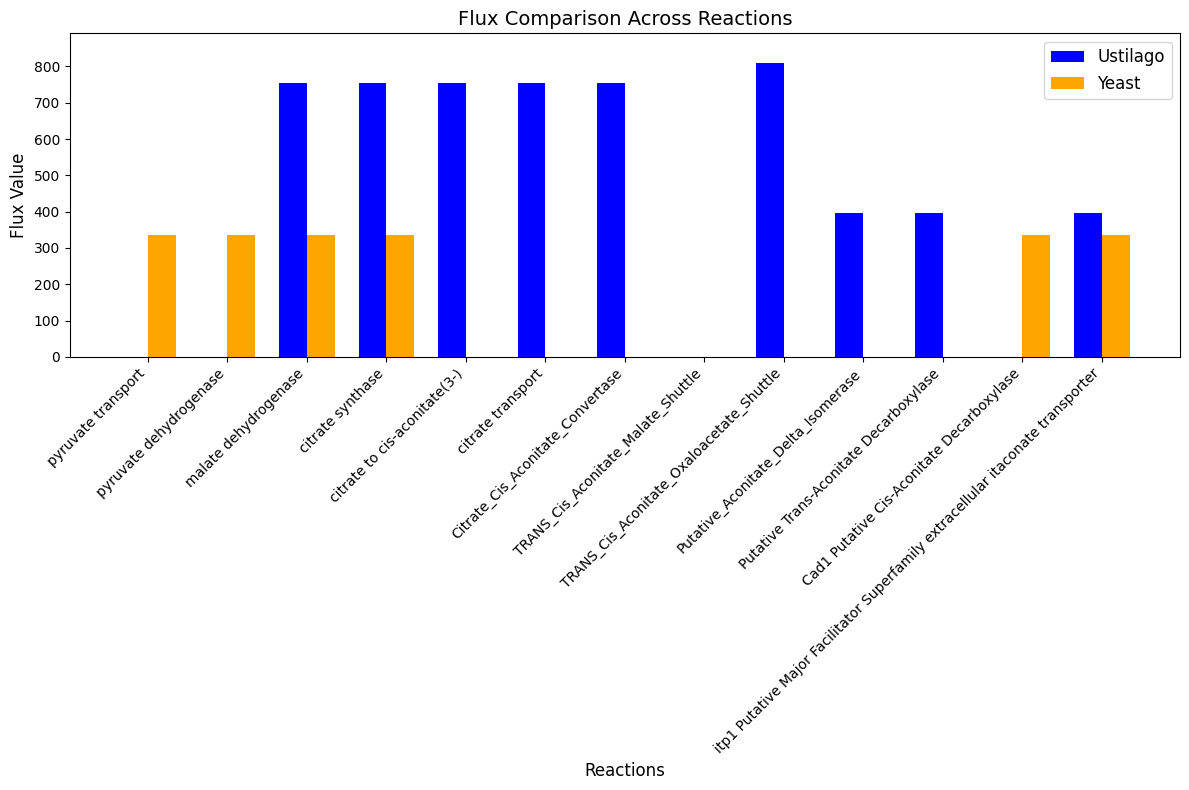

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from cobra import Model

reaction_glucose_iUma22= iUma22.reactions.get_by_id('EX_glc__D_e')
reaction_glucose_iUma22.lower_bound= -1000

reaction_glucose_yeast= yeast8_model_cp.reactions.get_by_id('r_1714')
reaction_glucose_yeast.lower_bound= -1000

reaction_citrate_malate_yeast= yeast8_model_cp.reactions.get_by_id('r_1126')
reaction_citrate_malate_yeast.lower_bound= -1000
reaction_citrate_malate_yeast.upper_bound= 1000

reaction_citrate_cisacon_c_yeast= yeast8_model_cp.reactions.get_by_id('r_0302')
reaction_citrate_cisacon_c_yeast.lower_bound= -1000
reaction_citrate_cisacon_c_yeast.upper_bound= 1000

def optimize_flux_and_get_reactions(model, reaction_ids, objective):
    """
    Optimizes the given model with the specified objective function and returns fluxes for the specified reactions.
    """
    model.objective = objective
    solution = model.optimize()
    return {rxn_id: solution.fluxes.get(rxn_id, 0) for rxn_id in reaction_ids}

def plot_flux_comparison(yeast_reaction_ids, iUma22_reaction_ids, yeast8_model_cp, iUma22, objective_yeast, objective_iUma22):
    """
    Plots a bar graph comparing the flux values of reactions between two models.
    Labels each bar with the corresponding reaction ID.
    """
    # Get reaction names for yeast
    yeast_reaction_names = [yeast8_model_cp.reactions.get_by_id(rxn_id).name for rxn_id in yeast_reaction_ids]
    fluxes_yeast8 = optimize_flux_and_get_reactions(yeast8_model_cp, yeast_reaction_ids, objective_yeast)
    fluxes_iUma22 = optimize_flux_and_get_reactions(iUma22, iUma22_reaction_ids, objective_iUma22)

    df = pd.DataFrame({
        "Reaction_ID_Yeast": yeast_reaction_ids,
        "Reaction_ID_Ustilago": iUma22_reaction_ids,
        "Reaction_Name": yeast_reaction_names,
        "Flux_UMaydis": [fluxes_iUma22.get(rxn_id, 0) for rxn_id in iUma22_reaction_ids],
        "Flux_Yeast": [fluxes_yeast8.get(rxn_id, 0) for rxn_id in yeast_reaction_ids]
    })
    print(df)
    df.to_csv("reaction_flux_comparison_main_pathway.csv", index=False)

    x = range(len(df))
    bar_width = 0.35
    plt.figure(figsize=(12, 8))
    bars_ustilago = plt.bar(x, df["Flux_UMaydis"], width=bar_width, label="Ustilago", color="blue")
    bars_yeast = plt.bar([i + bar_width for i in x], df["Flux_Yeast"], width=bar_width, label="Yeast", color="orange")
    #for i, bar in enumerate(bars_ustilago):
        #plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, 
                 #df["Reaction_ID_Ustilago"][i], ha='center', va='bottom', rotation=90, fontsize=6, color="blue")

    #for i, bar in enumerate(bars_yeast):
        #plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, 
                 #df["Reaction_ID_Yeast"][i], ha='center', va='bottom', rotation=90, fontsize=6, color="orange")

    plt.xticks([i + bar_width / 2 for i in x], df["Reaction_Name"], rotation=45, ha='right', fontsize=10)
    plt.ylabel("Flux Value", fontsize=12)
    plt.xlabel("Reactions", fontsize=12)
    plt.title("Flux Comparison Across Reactions", fontsize=14)
    plt.legend(fontsize=12)
    plt.ylim(0, max(max(df["Flux_UMaydis"].max(), df["Flux_Yeast"].max()) * 1.1, 1))
    plt.tight_layout()
    plt.show()

def main():
    yeast_reaction_ids = ['r_2034', 'r_0961', 'r_0713', 'r_0300', 'r_0302', 'r_1126', 'r_4785', 'r_4779', 'r_4784', 'r_4780', 'r_4781', 'r_4782', 'r_4783']
    iUma22_reaction_ids = [
        'TRANS_Pyruvate_Proton_Symporter', 'PDHm', 'CSp', 'ACONTa', 'ACONTa', 'ACONTa', 'ACONTa',
        'TRANS_Cis_Aconitate_Malate_Shuttle', 'TRANS_Cis_Aconitate_Oxaloacetate_Shuttle',
        'Putative_Aconitate_Delta_Isomerase', 'Putative_Trans_Aconitate_Decarboxylase', 
        'Putative_Cis_Aconitate_Decarboxylase', 'Putative_Itaconate_Transporter'
    ]

    objective_yeast = "r_4783"
    objective_iUma22 = "Putative_Itaconate_Transporter"
    
    plot_flux_comparison(yeast_reaction_ids, iUma22_reaction_ids, yeast8_model_cp, iUma22, objective_yeast, objective_iUma22)

if __name__ == "__main__":
    main()


In [48]:
def get_reaction_names(model, reaction_ids):
    reaction_info = {}
    for rxn_id in reaction_ids:
        if rxn_id in model.reactions:
            reaction_info[rxn_id] = model.reactions.get_by_id(rxn_id).name
        else:
            reaction_info[rxn_id] = "Not Found"
    return reaction_info
yeast_reaction_ids = ['r_2034', 'r_0961', 'r_0713', 'r_0300', 'r_0302', 'r_1126', 'r_4785', 'r_4779', 'r_4784', 'r_4780', 'r_4781', 'r_4782', 'r_4783']
iUma22_reaction_ids = [
        'TRANS_Pyruvate_Proton_Symporter', 'PDHm', 'CSp', 'ACONTa', 'ACONTa', 'ACONTa', 'ACONTa',
        'TRANS_Cis_Aconitate_Malate_Shuttle', 'TRANS_Cis_Aconitate_Oxaloacetate_Shuttle',
        'Putative_Aconitate_Delta_Isomerase', 'Putative_Trans_Aconitate_Decarboxylase', 
        'Putative_Cis_Aconitate_Decarboxylase', 'Putative_Itaconate_Transporter'
    ]

# Get reaction names for yeast and iUma22 models
yeast_reaction_names = get_reaction_names(yeast8_model_cp, yeast_reaction_ids)
iuma_reaction_names = get_reaction_names(iUma22, iUma22_reaction_ids)

# Print or store the names
print("Yeast Reactions:", yeast_reaction_names)
print("iUma22 Reactions:", iuma_reaction_names)


Yeast Reactions: {'r_2034': 'pyruvate transport', 'r_0961': 'pyruvate dehydrogenase', 'r_0713': 'malate dehydrogenase', 'r_0300': 'citrate synthase', 'r_0302': 'citrate to cis-aconitate(3-)', 'r_1126': 'citrate transport', 'r_4785': 'Citrate_Cis_Aconitate_Convertase', 'r_4779': 'TRANS_Cis_Aconitate_Malate_Shuttle', 'r_4784': 'TRANS_Cis_Aconitate_Oxaloacetate_Shuttle', 'r_4780': 'Putative_Aconitate_Delta_Isomerase', 'r_4781': 'Putative Trans-Aconitate Decarboxylase', 'r_4782': 'Cad1 Putative Cis-Aconitate Decarboxylase', 'r_4783': 'itp1 Putative Major Facilitator Superfamily extracellular itaconate transporter'}
iUma22 Reactions: {'TRANS_Pyruvate_Proton_Symporter': 'Pyruvate H+ Symporter', 'PDHm': 'PYRUVDEH-RXN', 'CSp': 'CITSYN-RXN', 'ACONTa': 'ACONITATEDEHYDR-RXN', 'TRANS_Cis_Aconitate_Malate_Shuttle': 'Cis Aconitate Malate Shuttle', 'TRANS_Cis_Aconitate_Oxaloacetate_Shuttle': 'TRANS_Cis_Aconitate_Oxaloacetate_Shuttle', 'Putative_Aconitate_Delta_Isomerase': 'adi1 Putative Aconitate Del

   Reaction_ID_Yeast                      Reaction_ID_Ustilago  \
0             r_2034           TRANS_Pyruvate_Proton_Symporter   
1             r_0961                                      PDHm   
2             r_0713                                       CSp   
3             r_0300                                    ACONTa   
4             r_0302                                    ACONTa   
5             r_4785                                    ACONTa   
6             r_4779        TRANS_Cis_Aconitate_Malate_Shuttle   
7             r_4784  TRANS_Cis_Aconitate_Oxaloacetate_Shuttle   
8             r_4780        Putative_Aconitate_Delta_Isomerase   
9             r_4781    Putative_Trans-Aconitate_Decarboxylase   
10            r_4782      Putative_Cis_Aconitate_Decarboxylase   
11            r_4783            Putative_Itaconate_Transporter   

                                        Reaction_Name  Flux_UMaydis  \
0                                  pyruvate transport      0.000000   

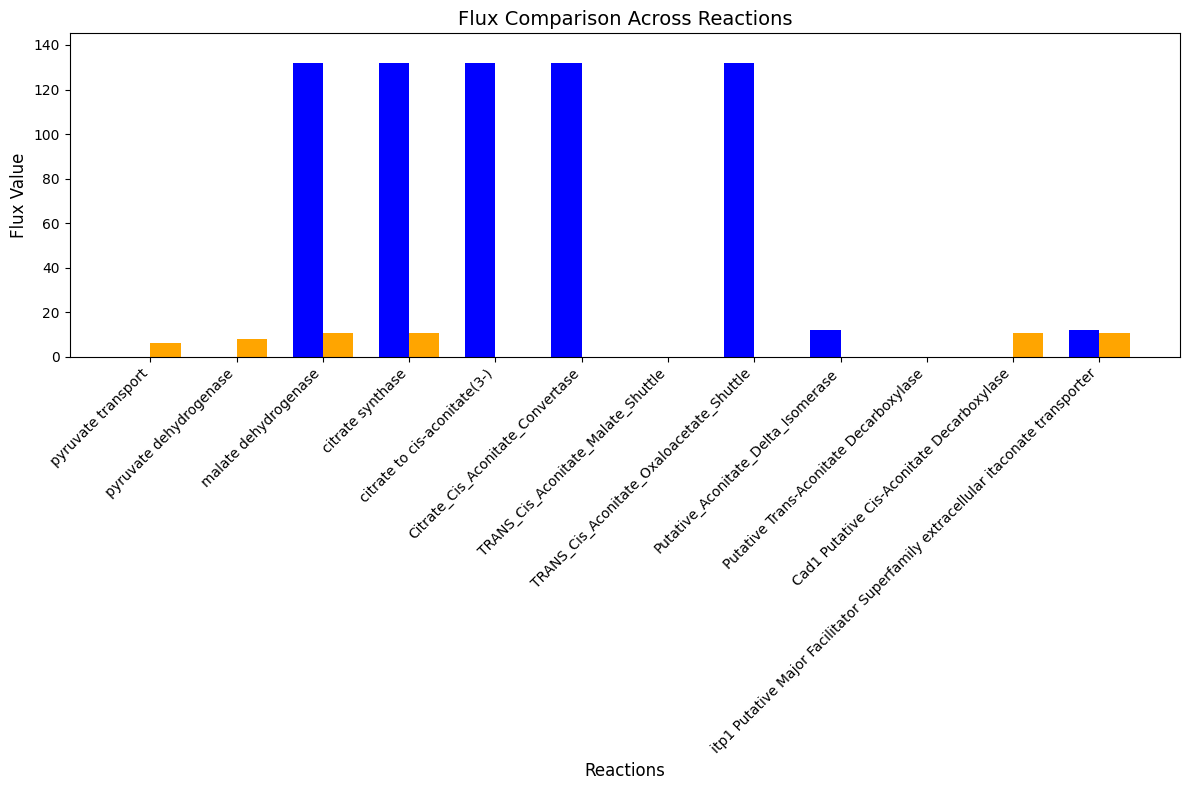

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from cobra import Model

reaction_glucose_iUma22= iUma22.reactions.get_by_id('EX_glc__D_e')
reaction_glucose_iUma22.lower_bound= -10

reaction_glucose_yeast= yeast8_model_cp.reactions.get_by_id('r_1714')
reaction_glucose_yeast.lower_bound= -10

reaction_citrate_malate_yeast= yeast8_model_cp.reactions.get_by_id('r_1126')
reaction_citrate_malate_yeast.lower_bound= 0
reaction_citrate_malate_yeast.upper_bound= 0

reaction_citrate_cisacon_c_yeast= yeast8_model_cp.reactions.get_by_id('r_0302')
reaction_citrate_cisacon_c_yeast.lower_bound= 0
reaction_citrate_cisacon_c_yeast.upper_bound= 0

def optimize_flux_and_get_reactions(model, reaction_ids, objective):
    """
    Optimizes the given model with the specified objective function and returns fluxes for the specified reactions.
    """
    model.objective = objective
    solution = model.optimize()
    return {rxn_id: solution.fluxes.get(rxn_id, 0) for rxn_id in reaction_ids}

def plot_flux_comparison(yeast_reaction_ids, iUma22_reaction_ids, yeast8_model_cp, iUma22, objective_yeast, objective_iUma22):
    """
    Plots a bar graph comparing the flux values of reactions between two models.
    Labels each bar with the corresponding reaction ID.
    """
    # Get reaction names for yeast
    yeast_reaction_names = [yeast8_model_cp.reactions.get_by_id(rxn_id).name for rxn_id in yeast_reaction_ids]
    fluxes_yeast8 = optimize_flux_and_get_reactions(yeast8_model_cp, yeast_reaction_ids, objective_yeast)
    fluxes_iUma22 = optimize_flux_and_get_reactions(iUma22, iUma22_reaction_ids, objective_iUma22)

    df = pd.DataFrame({
        "Reaction_ID_Yeast": yeast_reaction_ids,
        "Reaction_ID_Ustilago": iUma22_reaction_ids,
        "Reaction_Name": yeast_reaction_names,
        "Flux_UMaydis": [fluxes_iUma22.get(rxn_id, 0) for rxn_id in iUma22_reaction_ids],
        "Flux_Yeast": [fluxes_yeast8.get(rxn_id, 0) for rxn_id in yeast_reaction_ids]
    })
    print(df)
    df.to_csv("reaction_flux_comparison_main_pathway_constrained.csv", index=False)

    x = range(len(df))
    bar_width = 0.35
    plt.figure(figsize=(12, 8))
    bars_ustilago = plt.bar(x, df["Flux_UMaydis"], width=bar_width, label="Ustilago", color="blue")
    bars_yeast = plt.bar([i + bar_width for i in x], df["Flux_Yeast"], width=bar_width, label="Yeast", color="orange")
    #for i, bar in enumerate(bars_ustilago):
        #plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, 
                 #df["Reaction_ID_Ustilago"][i], ha='center', va='bottom', rotation=90, fontsize=6, color="blue")

    #for i, bar in enumerate(bars_yeast):
        #plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, 
                 #df["Reaction_ID_Yeast"][i], ha='center', va='bottom', rotation=90, fontsize=6, color="orange")
                 
    plt.xticks([i + bar_width / 2 for i in x], df["Reaction_Name"], rotation=45, ha='right', fontsize=10)
    plt.ylabel("Flux Value", fontsize=12)
    plt.xlabel("Reactions", fontsize=12)
    plt.title("Flux Comparison Across Reactions", fontsize=14)
    plt.ylim(0, max(max(df["Flux_UMaydis"].max(), df["Flux_Yeast"].max()) * 1.1, 1))
    plt.tight_layout()
    plt.show()

def main():
    yeast_reaction_ids = ['r_2034', 'r_0961', 'r_0713', 'r_0300', 'r_0302', 'r_4785', 'r_4779', 'r_4784', 'r_4780', 'r_4781', 'r_4782', 'r_4783']
    iUma22_reaction_ids = [
        'TRANS_Pyruvate_Proton_Symporter', 'PDHm', 'CSp', 'ACONTa', 'ACONTa', 'ACONTa', 
        'TRANS_Cis_Aconitate_Malate_Shuttle', 'TRANS_Cis_Aconitate_Oxaloacetate_Shuttle',
        'Putative_Aconitate_Delta_Isomerase', 'Putative_Trans-Aconitate_Decarboxylase', 
        'Putative_Cis_Aconitate_Decarboxylase', 'Putative_Itaconate_Transporter'
    ]

    objective_yeast = "r_4783"
    objective_iUma22 = "Putative_Itaconate_Transporter"
    
    plot_flux_comparison(yeast_reaction_ids, iUma22_reaction_ids, yeast8_model_cp, iUma22, objective_yeast, objective_iUma22)

if __name__ == "__main__":
    main()


# Search Word based Reaction Finding

In [178]:
search_word='carnitine'
for metabolite in yeast8_model_cp.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: s_0021, Name: (R)-carnitine, , Compartment: c
ID: s_0022, Name: (R)-carnitine, , Compartment: e
ID: s_0023, Name: (R)-carnitine, , Compartment: m
ID: s_0024, Name: (R)-carnitine, , Compartment: p
ID: s_1235, Name: O-acetylcarnitine, , Compartment: c
ID: s_1236, Name: O-acetylcarnitine, , Compartment: m
ID: s_1237, Name: O-acetylcarnitine, , Compartment: p


In [143]:
# yeast
search_word='ATP'
for metabolite in yeast8_model_cp.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: s_0326, Name: 5-phosphoribosyl-ATP, , Compartment: c
ID: s_0434, Name: ATP, , Compartment: c
ID: s_0435, Name: ATP, , Compartment: er
ID: s_0437, Name: ATP, , Compartment: m
ID: s_0438, Name: ATP, , Compartment: n
ID: s_0439, Name: ATP, , Compartment: p
ID: s_0586, Name: dATP, , Compartment: c
ID: s_2831, Name: ATP, , Compartment: erm
ID: s_2840, Name: ATP, , Compartment: lp
ID: s_2856, Name: ATP, , Compartment: ce
ID: s_3341, Name: ATP, , Compartment: vm
ID: s_3359, Name: ATP, , Compartment: gm
ID: s_3881, Name: ATP, , Compartment: v
ID: s_4196, Name: ATP, , Compartment: g
ID: s_4318, Name: dATP, , Compartment: m


In [ ]:


# Load metabolic model
model = yeast8_model_cp  # Replace with actual model path

# Function to find reactions with specific metabolites as reactant and product
def find_reactions_with_metabolites(reactant_met, product_met):
    """Find all reactions where reactant_met is in the reactants and product_met is in the products."""
    matching_reactions = []
    
    for rxn in model.reactions:
        reactants = {met.id for met in rxn.reactants}
        products = {met.id for met in rxn.products}
        
        # Check if the given metabolite is in the reactants and product lists
        if reactant_met in reactants and product_met in products:
            matching_reactions.append(rxn)  # Add the reaction object to the list
    
    return matching_reactions

# Example metabolites (replace with your desired metabolites)
reactant_met = "s_0796"  # Replace with your desired reactant metabolite ID
product_met = "s_2856"  # Replace with your desired product metabolite ID

# Get all reactions matching the condition
reactions = find_reactions_with_metabolites(reactant_met, product_met)

# Print the results in a table format
if reactions:
    print(f"Reactions with {reactant_met} as reactant and {product_met} as product:")
    print(f"{'Reaction ID':<20} {'Reaction Name':<40} {'Reaction Equation'}")
    print("="*80)  # Separator line
    
    # Loop through each matching reaction
    for rxn in reactions:
        reaction_id = rxn.id
        reaction_name = rxn.name if rxn.name else "No name"
        reaction_equation = rxn.build_reaction_string()  # Get the reaction equation
        
        # Print the reaction details in table format
        print(f"{reaction_id:<20} {reaction_name:<40} {reaction_equation}")
else:
    print(f"No reactions found with {reactant_met} as reactant and {product_met} as product.")


No reactions found with s_0796 as reactant and s_2856 as product.


In [194]:


# Function to find reactions with a specific metabolite as reactant
def find_reactions_with_reactant(reactant_met):
    """Find all reactions where reactant_met is a reactant in the reaction."""
    matching_reactions = []
    
    for rxn in model.reactions:
        reactants = {met.id for met in rxn.reactants}
        
        # Check if the given metabolite is in the reactants list
        if reactant_met in reactants:
            matching_reactions.append(rxn)  # Add the reaction object to the list
    
    return matching_reactions

# Example metabolite (replace with your desired reactant metabolite)
reactant_met = "s_4597"  # Replace with your desired reactant metabolite ID

# Get all reactions matching the condition
reactions = find_reactions_with_reactant(reactant_met)

# Print the results in a table format
if reactions:
    print(f"Reactions with {reactant_met} as reactant:")
    print(f"{'Reaction ID':<20} {'Reaction Name':<40} {'Reaction Equation'}")
    print("="*80)  # Separator line
    
    # Loop through each matching reaction
    for rxn in reactions:
        reaction_id = rxn.id
        reaction_name = rxn.name if rxn.name else "No name"
        reaction_equation = rxn.build_reaction_string()  # Get the reaction equation
        
        # Get metabolites with names and IDs for both reactants and products
        reactant_info = ", ".join([f"{met.name} ({met.id})" for met in rxn.reactants])
        product_info = ", ".join([f"{met.name} ({met.id})" for met in rxn.products])
        
        # Print the reaction details in table format
        print(f"{reaction_id:<20} {reaction_name:<40} {reactant_info} -> {product_info}")
else:
    print(f"No reactions found with {reactant_met} as reactant.")


No reactions found with s_4597 as reactant.


In [134]:
yeast8_model_cp.metabolites.get_by_id('s_0232').reactions

frozenset({<Reaction r_0024 at 0x283717f77a0>,
           <Reaction r_0062 at 0x283718285f0>,
           <Reaction r_1087 at 0x28371d230b0>})

In [137]:
yeast8_model_cp.reactions.get_by_id('r_1087')

Reaction identifier,r_1087
Name,valine transaminase
Memory address,0x28371d230b0
Stoichiometry,s_0180 + s_1056 <=> s_0232 + s_0991 2-oxoglutarate + L-valine <=> 3-methyl-2-oxobutanoate + L-glutamate
GPR,YJR148W
Lower bound,-1000.0
Upper bound,1000.0


In [187]:


# Function to find reactions with a specific metabolite as product
def find_reactions_with_product(product_met):
    """Find all reactions where product_met is a product in the reaction."""
    matching_reactions = []
    
    for rxn in model.reactions:
        products = {met.id for met in rxn.products}
        
        # Check if the given metabolite is in the products list
        if product_met in products:
            matching_reactions.append(rxn)  # Add the reaction object to the list
    
    return matching_reactions

# Example metabolite (replace with your desired product metabolite)
product_met = "s_0437"  # Replace with your desired product metabolite ID

# Get all reactions matching the condition
reactions = find_reactions_with_product(product_met)

# Print the results in a table format
if reactions:
    print(f"Reactions with {product_met} as product:")
    print(f"{'Reaction ID':<20} {'Reaction Name':<40} {'Reaction Equation'}")
    print("="*80)  # Separator line
    
    # Loop through each matching reaction
    for rxn in reactions:
        reaction_id = rxn.id
        reaction_name = rxn.name if rxn.name else "No name"
        reaction_equation = rxn.build_reaction_string()  # Get the reaction equation
        
        # Get metabolites with names and IDs for both reactants and products
        reactant_info = ", ".join([f"{met.name} ({met.id})" for met in rxn.reactants])
        product_info = ", ".join([f"{met.name} ({met.id})" for met in rxn.products])
        
        # Print the reaction details in table format
        print(f"{reaction_id:<20} {reaction_name:<40} {reactant_info} -> {product_info}")
else:
    print(f"No reactions found with {product_met} as product.")


Reactions with s_0437 as product:
Reaction ID          Reaction Name                            Reaction Equation
r_0226               ATP synthase                             ADP (s_0397), H+ (s_0794), phosphate (s_1326) -> ATP (s_0437), H+ (s_0799), H2O (s_0807)
r_1022               succinate-CoA ligase (ADP-forming)       ADP (s_0397), phosphate (s_1326), succinyl-CoA (s_1464) -> ATP (s_0437), coenzyme A (s_0532), succinate (s_1460)


[<Gene Q0045 at 0x15474709e20>, <Gene Q0080 at 0x15474709df0>, <Gene Q0085 at 0x15474709e80>, <Gene Q0105 at 0x15474709f70>, <Gene Q0130 at 0x1547470a060>, <Gene Q0250 at 0x1547470a150>, <Gene Q0275 at 0x1547470a240>, <Gene YAL012W at 0x1547470a360>, <Gene YAL022C at 0x1547470a450>, <Gene YAL023C at 0x1547470a510>, <Gene YAL026C at 0x1547470a5d0>, <Gene YAL035W at 0x1547470a690>, <Gene YAL038W at 0x1547470a750>, <Gene YAL039C at 0x1547470a810>, <Gene YAL044C at 0x1547470a8d0>, <Gene YAL054C at 0x1547470a990>, <Gene YAL060W at 0x1547470aa50>, <Gene YAL061W at 0x1547470ab10>, <Gene YAL062W at 0x1547470abd0>, <Gene YAR015W at 0x1547470ac90>, <Gene YAR035W at 0x1547470ad50>, <Gene YAR071W at 0x1547470ae10>, <Gene YBL011W at 0x1547470aed0>, <Gene YBL013W at 0x1547470af90>, <Gene YBL015W at 0x1547470b050>, <Gene YBL030C at 0x1547470b110>, <Gene YBL033C at 0x1547470b1d0>, <Gene YBL039C at 0x1547470b290>, <Gene YBL042C at 0x1547470b350>, <Gene YBL045C at 0x1547470b410>, <Gene YBL064C at 0x1547

C:\Users\Anand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
C:\Users\Anand\AppData\Local\Temp\ipykernel_22432\3396388823.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_knockouts= pd.concat([df_knockouts, df_knockouts_temp], ignore_index=True)


[np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float64(0.09), np.float6

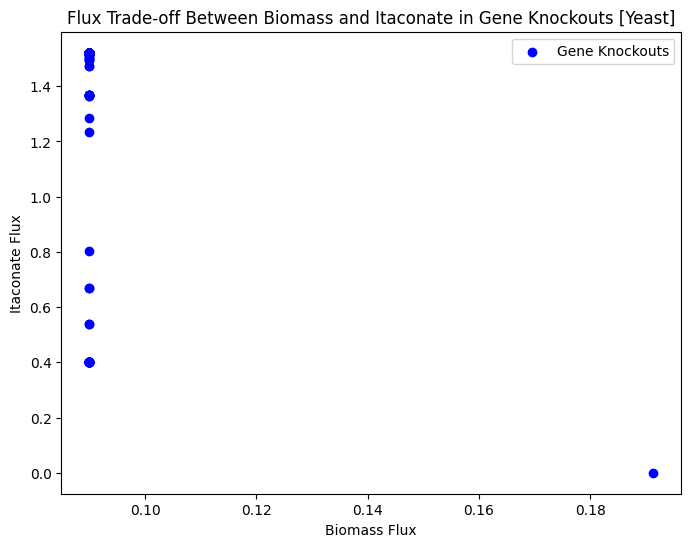

In [76]:
x_biomass_flux = []
y_itaconate_flux = []
gene_id_label=[]
biomass_id='r_2111'
itaconate_id= 'r_4783'
biomass_rxn = yeast8_model_cp.reactions.get_by_id('r_2111')
itaconate_rxn=yeast8_model_cp.reactions.get_by_id('r_4783')
biomass_rxn.lower_bound=0.09
itaconate_rxn.lower_bound=0.4
EX_glc__D_e = yeast8_model_cp.reactions.get_by_id('r_1714')
EX_ac_e = yeast8_model_cp.reactions.get_by_id('r_1634')
EX_ac_e.bounds = (-10.0, 0.0)
EX_glc__D_e.bounds = (0, 0)
df_knockouts = pd.DataFrame(columns=['Gene Knocked Out', 'Itaconate Flux', 'Biomass Flux'])
print(yeast8_model_cp.genes)
for gene in yeast8_model_cp.genes:
    with yeast8_model_cp as model:
        gene_id=gene.id
        #print(gene_id)
        #gene_id_label.append (gene_id)
        #model.genes.gene.knock_out()
        gene.knock_out()
        biomass_flux_expr = model.reactions.get_by_id(biomass_id).flux_expression
        product_flux_expr = model.reactions.get_by_id(itaconate_id).flux_expression
        model.objective = (0.5) * biomass_flux_expr + (0.5)* product_flux_expr
        solution = model.optimize()
        biomass_flux = solution.fluxes[biomass_id]
        x_biomass_flux.append(biomass_flux)
        itaconate_flux = solution.fluxes[itaconate_id]
        y_itaconate_flux.append(itaconate_flux)
        df_knockouts_temp= pd.DataFrame({'Gene Knocked Out':[gene_id], 'Itaconate Flux':[itaconate_flux], 'Biomass Flux': [biomass_flux]})
        df_knockouts= pd.concat([df_knockouts, df_knockouts_temp], ignore_index=True)
print (x_biomass_flux)   
print (y_itaconate_flux) 
print (gene_id_label)
print(df_knockouts)
df_knockouts.to_csv('Knockouts_yeastbased3.csv')
plt.figure(figsize=(8, 6))
plt.scatter(x_biomass_flux, y_itaconate_flux, color='b', label='Gene Knockouts')
plt.xlabel("Biomass Flux")
plt.ylabel("Itaconate Flux")
plt.title("Flux Trade-off Between Biomass and Itaconate in Gene Knockouts [Yeast]")
plt.legend()
plt.show()

In [124]:
biomass_id='r_2111'
itaconate_id= 'r_4783'
biomass_rxn = yeast8_model_cp.reactions.get_by_id('r_2111')
itaconate_rxn=yeast8_model_cp.reactions.get_by_id('r_4783')
biomass_rxn.lower_bound=0.252
itaconate_rxn.lower_bound=0.4
EX_glc__D_e = yeast8_model_cp.reactions.get_by_id('r_1714')
EX_ac_e = yeast8_model_cp.reactions.get_by_id('r_1634')
EX_ac_e.bounds = (-20.0, 0.0)
EX_glc__D_e.bounds = (0, 0)
biomass_flux_expr = model.reactions.get_by_id(biomass_id).flux_expression
product_flux_expr = model.reactions.get_by_id(itaconate_id).flux_expression
model.objective = (0.4) * biomass_flux_expr + (0.6)* product_flux_expr
solution = model.optimize()
biomass_flux_og = solution.fluxes[biomass_id]
print('Biomass Flux with no k/o =', biomass_flux_og)
itaconate_flux_og = solution.fluxes[itaconate_id]
print('Itaconate Flux with no k/o =', itaconate_flux_og)

Biomass Flux with no k/o = 0.252
Itaconate Flux with no k/o = 2.0074953923303966


# Network Comparison

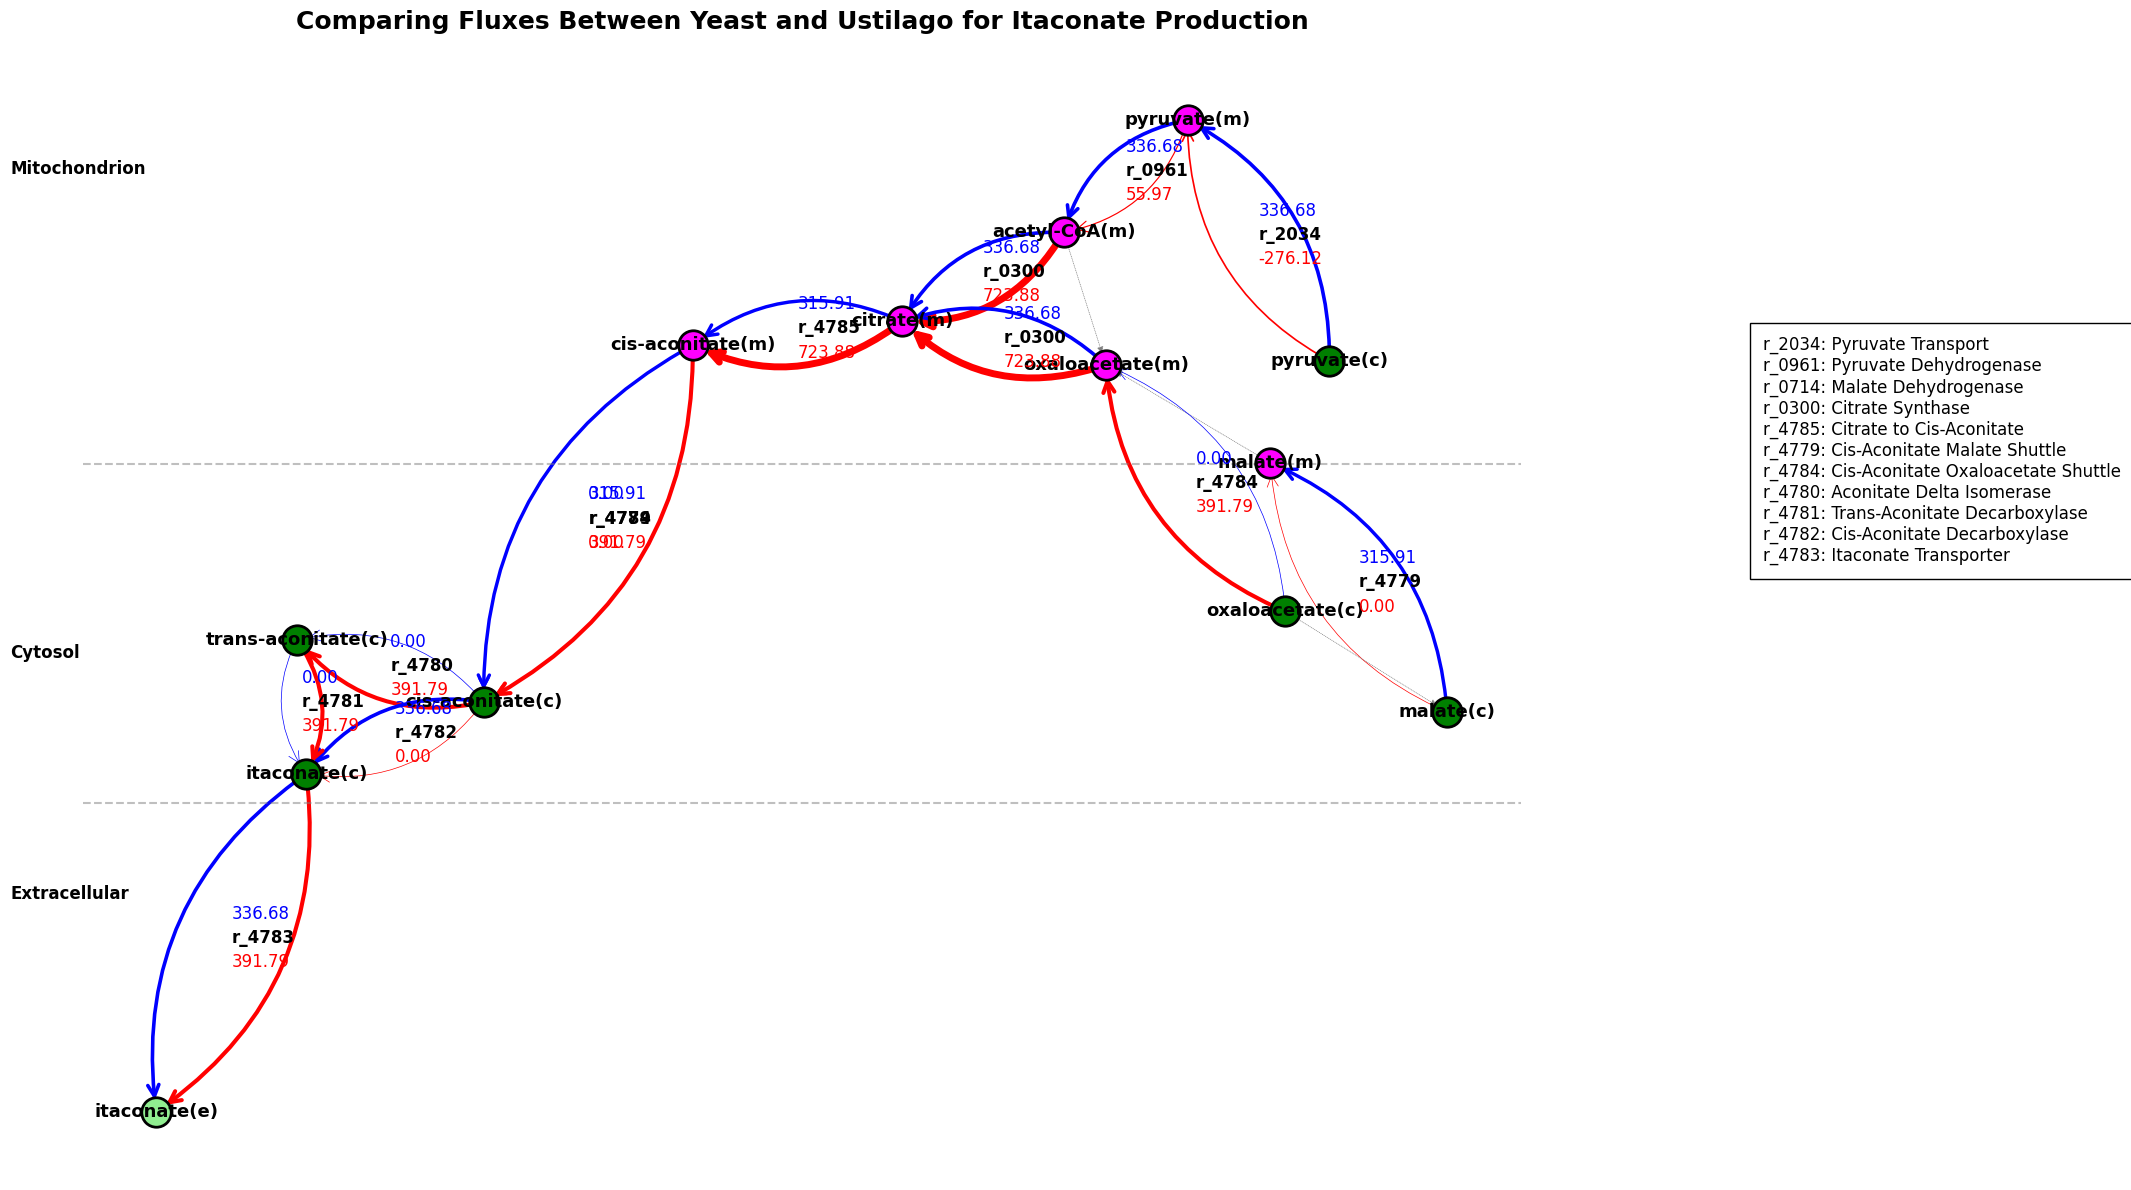

In [179]:
import matplotlib.pyplot as plt
import networkx as nx
import cobra
import numpy as np

reaction_glucose_iUma22= iUma22.reactions.get_by_id('EX_glc__D_e')
reaction_glucose_iUma22.lower_bound= -1000

reaction_glucose_yeast= yeast8_model_cp.reactions.get_by_id('r_1714')
reaction_glucose_yeast.lower_bound= -1000

#reaction_citrate_malate_yeast= yeast8_model_cp.reactions.get_by_id('r_1126')
#reaction_citrate_malate_yeast.lower_bound= 0
#reaction_citrate_malate_yeast.upper_bound= 0


def optimize_flux_and_get_reactions(model, reaction_ids, objective):
    model.objective = objective
    solution = model.optimize()
    return {rxn_id: solution.fluxes.get(rxn_id, 0) for rxn_id in reaction_ids}

def create_flux_network():
    G = nx.MultiDiGraph()
    
    metabolites = [
        'pyruvate(c)', 'pyruvate(m)', 'acetyl-CoA(m)', 'oxaloacetate(m)', 'citrate(m)', 
        'cis-aconitate(m)', 'cis-aconitate(c)', 'trans-aconitate(c)', 'itaconate(c)', 'itaconate(e)', 
        'malate(m)', 'malate(c)', 'oxaloacetate(c)'
    ]
    G.add_nodes_from(metabolites)
    
    reactions = [
        ('pyruvate(c)', 'pyruvate(m)', 'r_2034'),
        ('pyruvate(m)', 'acetyl-CoA(m)', 'r_0961'),
        ('acetyl-CoA(m)', 'citrate(m)', 'r_0300'),
        ('oxaloacetate(m)', 'citrate(m)', 'r_0300'),
        ('citrate(m)', 'cis-aconitate(m)', 'r_4785'),
        ('cis-aconitate(m)', 'cis-aconitate(c)', 'r_4779'),
        ('malate(c)', 'malate(m)', 'r_4779'),
        ('cis-aconitate(m)', 'cis-aconitate(c)', 'r_4784'),
        ('oxaloacetate(c)', 'oxaloacetate(m)', 'r_4784'),
        ('cis-aconitate(c)', 'trans-aconitate(c)', 'r_4780'),
        ('trans-aconitate(c)', 'itaconate(c)', 'r_4781'),
        ('cis-aconitate(c)', 'itaconate(c)', 'r_4782'),
        ('itaconate(c)', 'itaconate(e)', 'r_4783'),
        ('acetyl-CoA(m)', 'oxaloacetate(m)', ''),
        ('malate(m)', 'oxaloacetate(m)', ''),
        ('oxaloacetate(c)', 'malate(c)', '')
    ]
    
    objective_yeast = "r_4783"
    objective_iUma22 = "Putative_Itaconate_Transporter"
    
    reaction_mapping = {
        'r_2034': 'TRANS_Pyruvate_Proton_Symporter',
        'r_0961': 'PDHm',
        'r_0714': 'MDHm',
        'r_0300': 'CSp',
        'r_4785': 'ACONTa',
        'r_4779': 'TRANS_Cis_Aconitate_Malate_Shuttle',
        'r_4784': 'TRANS_Cis_Aconitate_Oxaloacetate_Shuttle',
        'r_4780': 'Putative_Aconitate_Delta_Isomerase',
        'r_4781': 'Putative_Trans_Aconitate_Decarboxylase',
        'r_4782': 'Putative_Cis_Aconitate_Decarboxylase',
        'r_4783': 'Putative_Itaconate_Transporter'
    }
    
    yeast_fluxes = optimize_flux_and_get_reactions(yeast8_model_cp, [r[2] for r in reactions if r[2]], objective_yeast)
    iuma_fluxes = optimize_flux_and_get_reactions(iUma22, [reaction_mapping.get(r[2], r[2]) for r in reactions if r[2]], objective_iUma22)
    
    max_flux = max(max(yeast_fluxes.values()), max(iuma_fluxes.values()))
    
    for met1, met2, rxn_id in reactions:
        yeast_flux = yeast_fluxes.get(rxn_id, 0)
        iuma_flux = iuma_fluxes.get(reaction_mapping.get(rxn_id, rxn_id), 0)
        
        yeast_weight = 0.5 if yeast_flux == 0 else 0.5 + (yeast_flux / max_flux) * 4.5
        iuma_weight = 0.5 if iuma_flux == 0 else 0.5 + (iuma_flux / max_flux) * 4.5
        
        G.add_edge(met1, met2, yeast_flux=yeast_flux, iuma_flux=iuma_flux, rxn_id=rxn_id,
                   yeast_weight=yeast_weight, iuma_weight=iuma_weight)
    
    return G, yeast_fluxes, iuma_fluxes

def visualize_flux_network(G, yeast_fluxes, iuma_fluxes):
    plt.figure(figsize=(22, 12))
    
    # Create custom layout similar to the image
    pos = nx.kamada_kawai_layout(G)
    
    # Adjust positions for better compartmentalization
    for node in G.nodes():
        x, y = pos[node]
        if '(m)' in node:
            pos[node] = (x, y + 0.5)
        elif '(c)' in node:
            pos[node] = (x, y - 0.2)
        elif '(e)' in node:
            pos[node] = (x, y - 0.7)
    
    # Draw compartment lines
    plt.axhline(y=0.2, color='gray', linestyle='--', alpha=0.5)
    plt.axhline(y=-0.5, color='gray', linestyle='--', alpha=0.5)
    
    # Add compartment labels
    plt.text(-1.2, 0.8, 'Mitochondrion', fontsize=12, fontweight='bold')
    plt.text(-1.2, -0.2, 'Cytosol', fontsize=12, fontweight='bold')
    plt.text(-1.2, -0.7, 'Extracellular', fontsize=12, fontweight='bold')
    
    # Draw nodes
    for node in G.nodes():
        color = 'magenta' if '(m)' in node else 'green' if '(c)' in node else 'lightgreen'
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=450, 
                             node_color=color, edgecolors='black', linewidths=2)
    
    # Draw node labels
    nx.draw_networkx_labels(G, pos, font_size=13, font_weight='bold')
    
    # Draw edges and labels
    for (u, v, data) in G.edges(data=True):
        if data['rxn_id']:
            # Draw yeast flux (blue)
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='blue',
                                 width=data['yeast_weight'],
                                 connectionstyle="arc3,rad=0.3",
                                 arrowsize=20, arrowstyle='->')
            
            # Draw Ustilago flux (red)
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='red',
                                 width=data['iuma_weight'],
                                 connectionstyle="arc3,rad=-0.3",
                                 arrowsize=20, arrowstyle='->')
            
            # Add labels
            mid_x = (pos[u][0] + pos[v][0])/2
            mid_y = (pos[u][1] + pos[v][1])/2
            plt.text(mid_x, mid_y, data['rxn_id'], color='black', 
                    fontsize=12, fontweight='bold')
            plt.text(mid_x, mid_y+0.05, f"{data['yeast_flux']:.2f}", 
                    color='blue', fontsize=12)
            plt.text(mid_x, mid_y-0.05, f"{data['iuma_flux']:.2f}", 
                    color='red', fontsize=12)
        else:
            # Draw dotted lines
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)],
                                 edge_color='gray', width=0.5,
                                 style='dotted')
    
    # Add reaction descriptions
    keywords = {
        'r_2034': 'Pyruvate Transport',
        'r_0961': 'Pyruvate Dehydrogenase',
        'r_0714': 'Malate Dehydrogenase',
        'r_0300': 'Citrate Synthase',
        'r_4785': 'Citrate to Cis-Aconitate',
        'r_4779': 'Cis-Aconitate Malate Shuttle',
        'r_4784': 'Cis-Aconitate Oxaloacetate Shuttle',
        'r_4780': 'Aconitate Delta Isomerase',
        'r_4781': 'Trans-Aconitate Decarboxylase',
        'r_4782': 'Cis-Aconitate Decarboxylase',
        'r_4783': 'Itaconate Transporter'
    }
    
    keyword_text = "\n".join([f"{rxn_id}: {desc}" for rxn_id, desc in keywords.items()])
    plt.text(1.2, 0, keyword_text, fontsize=12,
             bbox=dict(facecolor='white', edgecolor='black', pad=10))
    
    plt.title("Comparing Fluxes Between Yeast and Ustilago for Itaconate Production",
              fontsize=18, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    G, yeast_fluxes, iuma_fluxes = create_flux_network()
    visualize_flux_network(G, yeast_fluxes, iuma_fluxes)

if __name__ == "__main__":
    main()


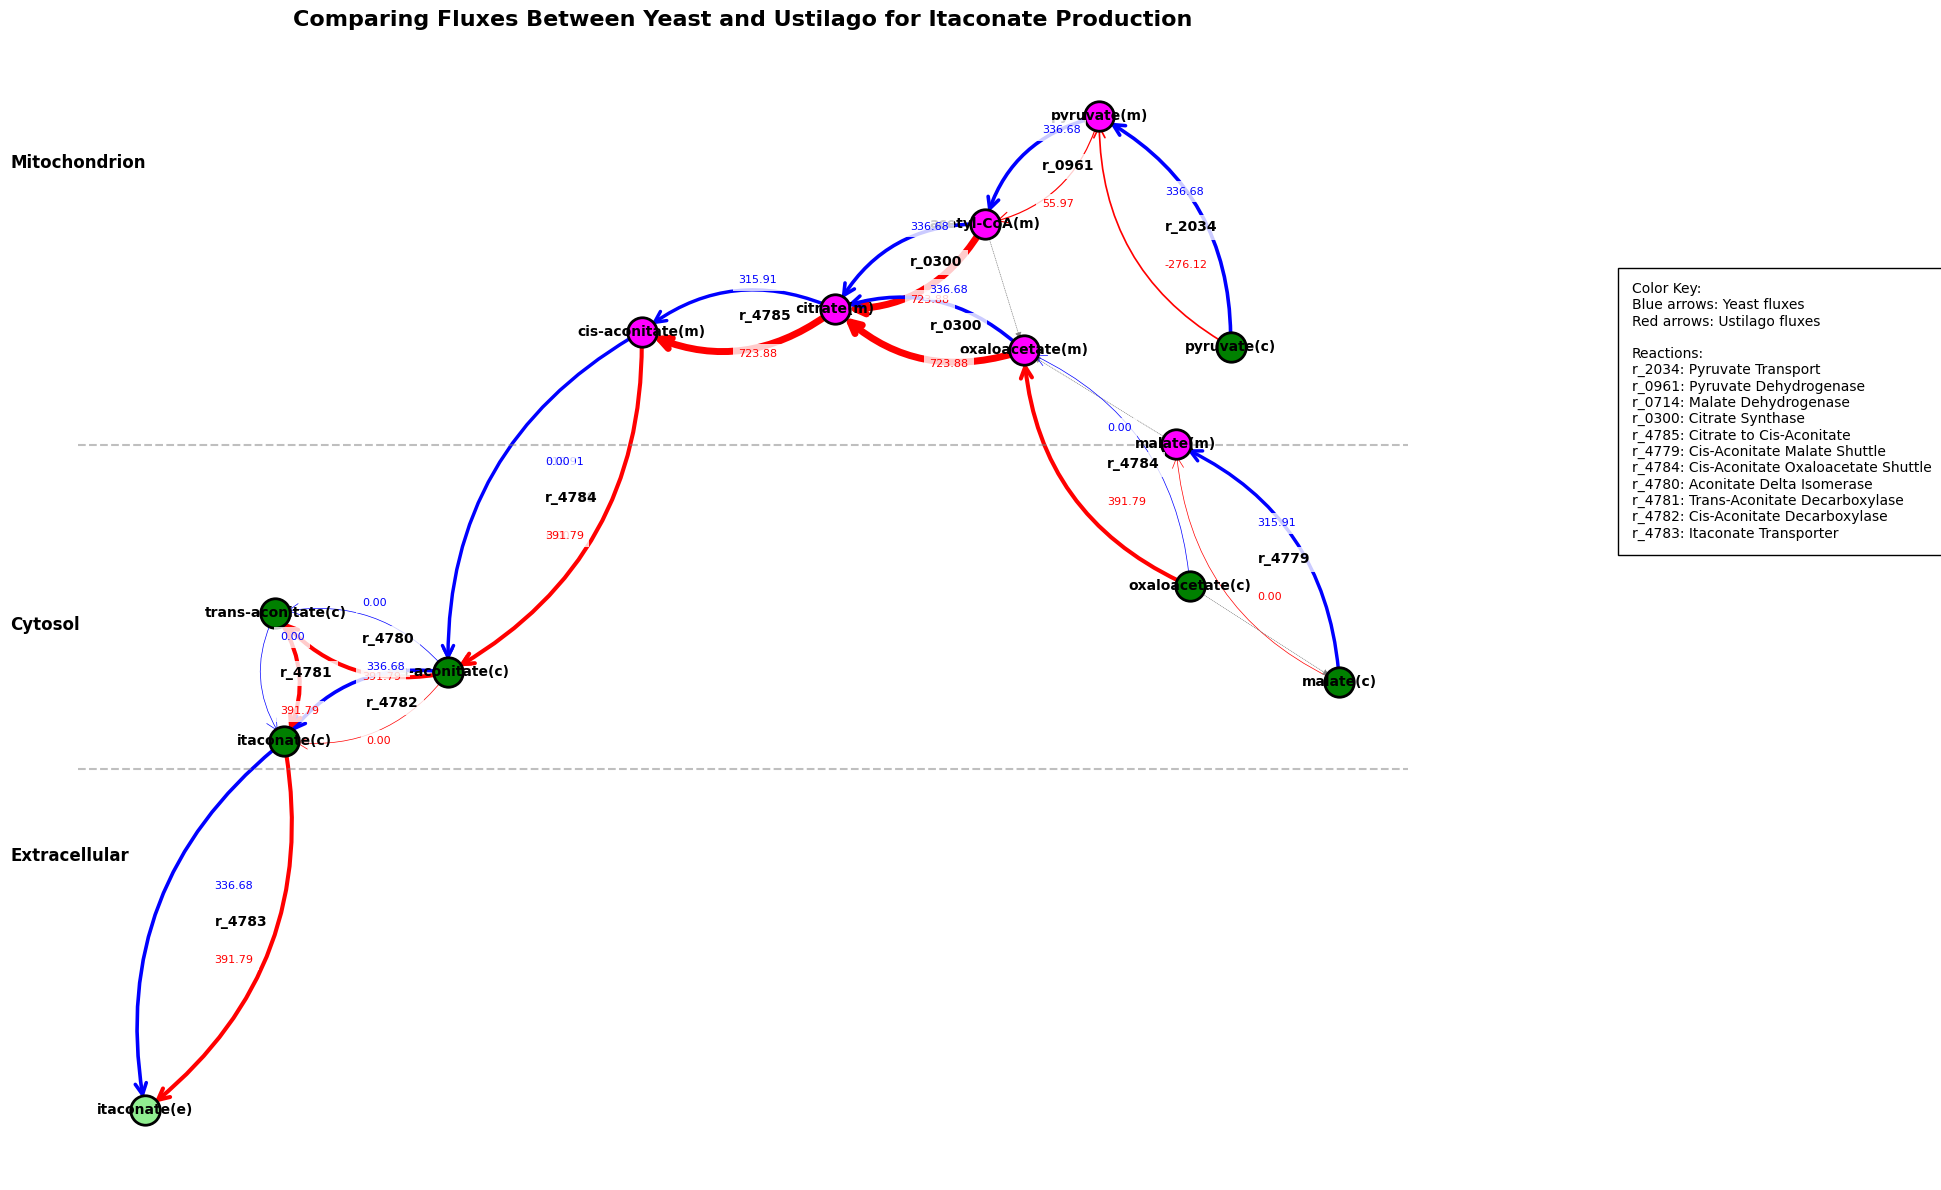

In [170]:
import matplotlib.pyplot as plt
import networkx as nx
import cobra
import numpy as np

reaction_glucose_iUma22= iUma22.reactions.get_by_id('EX_glc__D_e')
reaction_glucose_iUma22.lower_bound= -1000

reaction_glucose_yeast= yeast8_model_cp.reactions.get_by_id('r_1714')
reaction_glucose_yeast.lower_bound= -1000

def optimize_flux_and_get_reactions(model, reaction_ids, objective):
    model.objective = objective
    solution = model.optimize()
    return {rxn_id: solution.fluxes.get(rxn_id, 0) for rxn_id in reaction_ids}

def create_flux_network():
    G = nx.MultiDiGraph()
    
    metabolites = [
        'pyruvate(c)', 'pyruvate(m)', 'acetyl-CoA(m)', 'oxaloacetate(m)', 'citrate(m)', 
        'cis-aconitate(m)', 'cis-aconitate(c)', 'trans-aconitate(c)', 'itaconate(c)', 'itaconate(e)', 
        'malate(m)', 'malate(c)', 'oxaloacetate(c)'
    ]
    G.add_nodes_from(metabolites)
    
    reactions = [
        ('pyruvate(c)', 'pyruvate(m)', 'r_2034'),
        ('pyruvate(m)', 'acetyl-CoA(m)', 'r_0961'),
        ('acetyl-CoA(m)', 'citrate(m)', 'r_0300'),
        ('oxaloacetate(m)', 'citrate(m)', 'r_0300'),
        ('citrate(m)', 'cis-aconitate(m)', 'r_4785'),
        ('cis-aconitate(m)', 'cis-aconitate(c)', 'r_4779'),
        ('malate(c)', 'malate(m)', 'r_4779'),
        ('cis-aconitate(m)', 'cis-aconitate(c)', 'r_4784'),
        ('oxaloacetate(c)', 'oxaloacetate(m)', 'r_4784'),
        ('cis-aconitate(c)', 'trans-aconitate(c)', 'r_4780'),
        ('trans-aconitate(c)', 'itaconate(c)', 'r_4781'),
        ('cis-aconitate(c)', 'itaconate(c)', 'r_4782'),
        ('itaconate(c)', 'itaconate(e)', 'r_4783'),
        ('acetyl-CoA(m)', 'oxaloacetate(m)', ''),
        ('malate(m)', 'oxaloacetate(m)', ''),
        ('oxaloacetate(c)', 'malate(c)', '')
    ]
    
    objective_yeast = "r_4783"
    objective_iUma22 = "Putative_Itaconate_Transporter"
    
    reaction_mapping = {
        'r_2034': 'TRANS_Pyruvate_Proton_Symporter',
        'r_0961': 'PDHm',
        'r_0714': 'MDHm',
        'r_0300': 'CSp',
        'r_4785': 'ACONTa',
        'r_4779': 'TRANS_Cis_Aconitate_Malate_Shuttle',
        'r_4784': 'TRANS_Cis_Aconitate_Oxaloacetate_Shuttle',
        'r_4780': 'Putative_Aconitate_Delta_Isomerase',
        'r_4781': 'Putative_Trans_Aconitate_Decarboxylase',
        'r_4782': 'Putative_Cis_Aconitate_Decarboxylase',
        'r_4783': 'Putative_Itaconate_Transporter'
    }
    
    yeast_fluxes = optimize_flux_and_get_reactions(yeast8_model_cp, [r[2] for r in reactions if r[2]], objective_yeast)
    iuma_fluxes = optimize_flux_and_get_reactions(iUma22, [reaction_mapping.get(r[2], r[2]) for r in reactions if r[2]], objective_iUma22)
    
    max_flux = max(max(yeast_fluxes.values()), max(iuma_fluxes.values()))
    
    for met1, met2, rxn_id in reactions:
        yeast_flux = yeast_fluxes.get(rxn_id, 0)
        iuma_flux = iuma_fluxes.get(reaction_mapping.get(rxn_id, rxn_id), 0)
        
        yeast_weight = 0.5 if yeast_flux == 0 else 0.5 + (yeast_flux / max_flux) * 4.5
        iuma_weight = 0.5 if iuma_flux == 0 else 0.5 + (iuma_flux / max_flux) * 4.5
        
        G.add_edge(met1, met2, yeast_flux=yeast_flux, iuma_flux=iuma_flux, rxn_id=rxn_id,
                   yeast_weight=yeast_weight, iuma_weight=iuma_weight)
    
    return G, yeast_fluxes, iuma_fluxes

def visualize_flux_network(G, yeast_fluxes, iuma_fluxes):
    plt.figure(figsize=(20, 12))
    
    pos = nx.kamada_kawai_layout(G)
    
    for node in G.nodes():
        x, y = pos[node]
        if '(m)' in node:
            pos[node] = (x, y + 0.5)
        elif '(c)' in node:
            pos[node] = (x, y - 0.2)
        elif '(e)' in node:
            pos[node] = (x, y - 0.8)
    
    plt.axhline(y=0.2, color='gray', linestyle='--', alpha=0.5)
    plt.axhline(y=-0.5, color='gray', linestyle='--', alpha=0.5)
    
    plt.text(-1.2, 0.8, 'Mitochondrion', fontsize=12, fontweight='bold')
    plt.text(-1.2, -0.2, 'Cytosol', fontsize=12, fontweight='bold')
    plt.text(-1.2, -0.7, 'Extracellular', fontsize=12, fontweight='bold')
    
    for node in G.nodes():
        color = 'magenta' if '(m)' in node else 'green' if '(c)' in node else 'lightgreen'
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=450, 
                             node_color=color, edgecolors='black', linewidths=2)
    
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    for (u, v, data) in G.edges(data=True):
        if data['rxn_id']:
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='blue',
                                 width=data['yeast_weight'],
                                 connectionstyle="arc3,rad=0.3",
                                 arrowsize=20, arrowstyle='->')
            
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='red',
                                 width=data['iuma_weight'],
                                 connectionstyle="arc3,rad=-0.3",
                                 arrowsize=20, arrowstyle='->')
            
            mid_x = (pos[u][0] + pos[v][0])/2
            mid_y = (pos[u][1] + pos[v][1])/2
            
            plt.text(mid_x, mid_y, data['rxn_id'], color='black', 
                    fontsize=10, fontweight='bold',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
            plt.text(mid_x, mid_y+0.08, f"{data['yeast_flux']:.2f}", 
                    color='blue', fontsize=8,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
            plt.text(mid_x, mid_y-0.08, f"{data['iuma_flux']:.2f}", 
                    color='red', fontsize=8,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))
        else:
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)],
                                 edge_color='gray', width=0.5,
                                 style='dotted')
    
    legend_text = "Color Key:\nBlue arrows: Yeast fluxes\nRed arrows: Ustilago fluxes\n\nReactions:"
    keywords = {
        'r_2034': 'Pyruvate Transport',
        'r_0961': 'Pyruvate Dehydrogenase',
        'r_0714': 'Malate Dehydrogenase',
        'r_0300': 'Citrate Synthase',
        'r_4785': 'Citrate to Cis-Aconitate',
        'r_4779': 'Cis-Aconitate Malate Shuttle',
        'r_4784': 'Cis-Aconitate Oxaloacetate Shuttle',
        'r_4780': 'Aconitate Delta Isomerase',
        'r_4781': 'Trans-Aconitate Decarboxylase',
        'r_4782': 'Cis-Aconitate Decarboxylase',
        'r_4783': 'Itaconate Transporter'
    }
    
    keyword_text = legend_text + "\n" + "\n".join([f"{rxn_id}: {desc}" for rxn_id, desc in keywords.items()])
    plt.text(1.2, 0, keyword_text, fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', pad=10))
    
    plt.title("Comparing Fluxes Between Yeast and Ustilago for Itaconate Production",
              fontsize=16, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    G, yeast_fluxes, iuma_fluxes = create_flux_network()
    visualize_flux_network(G, yeast_fluxes, iuma_fluxes)

if __name__ == "__main__":
    main()


In [84]:
yeast8_model_cp.reactions.get_by_id('r_4780')


Reaction identifier,r_4780
Name,Putative_Aconitate_Delta_Isomerase
Memory address,0x25c4282af90
Stoichiometry,s_0516 <=> s_1503 cis-aconitate <=> trans-aconitate
GPR,UMAG_2
Lower bound,-1000.0
Upper bound,1000.0


In [70]:
search_word='s_0068'
for metabolite in yeast8_model_cp.metabolites:
    if search_word in metabolite.id:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: s_0068, Name: (S)-malate, , Compartment: m


In [73]:
yeast8_model_cp.metabolites.get_by_id('s_0068').reactions

frozenset({<Reaction r_0451 at 0x25c4142f170>,
           <Reaction r_0713 at 0x25c41526900>,
           <Reaction r_0718 at 0x25c415276b0>,
           <Reaction r_0719 at 0x25c41527950>,
           <Reaction r_1126 at 0x25c4169d490>,
           <Reaction r_1226 at 0x25c4171d790>,
           <Reaction r_2132 at 0x25c418ff2f0>,
           <Reaction r_4779 at 0x25c4282ac30>,
           <Reaction r_4784 at 0x25c4282b5f0>})

In [486]:
# iUma22
search_word='cis-aconitate'
for metabolite in yeast8_model_cp.metabolites:
    if search_word in metabolite.name:
        print(f"ID: {metabolite.id}, Name: {metabolite.name}, , Compartment: {metabolite.compartment}")

ID: s_0516, Name: cis-aconitate, , Compartment: c
ID: s_0517, Name: cis-aconitate, , Compartment: m


# Reaction Mapping

In [39]:
mapping_df = pd.read_csv("C:/Lenovo Laptop Data/user data/Downloads/DAAD DDP/Computational/Yeast_9_bigg_mapping.csv")

In [40]:
ustilago_reactions = [rxn.id for rxn in iUma22.reactions]

In [118]:
def clean_reaction_ids(df, col):
    return df[col].str.strip().str.replace('^R_', '', regex=True)

# Clean and map reaction IDs
mapping_df["Modified_Column1"] = clean_reaction_ids(mapping_df, mapping_df.columns[0])
mapping_df["Modified_Column2"] = clean_reaction_ids(mapping_df, mapping_df.columns[1])

# Extract Ustilago reactions
ustilago_reactions = [rxn.id for rxn in iUma22.reactions]

# Optimize iUma22 for itaconate production
itaconate_rxn = iUma22.reactions.get_by_id("Putative_Itaconate_Transporter")
iUma22.objective = itaconate_rxn.id
itaconate_solution_iUma22 = iUma22.optimize()

# Optimize yeast model for itaconate production (outside the loop)
yeast8_model_cp.objective = "r_4783"  # Set yeast objective for itaconate
itaconate_solution_yeast = yeast8_model_cp.optimize()

# Initialize results list
results = []

# Loop through Ustilago reactions
for rxn_id in ustilago_reactions:
    # Get flux for Ustilago model under itaconate-optimized conditions
    flux_iUma22 = itaconate_solution_iUma22.fluxes.get(rxn_id, None)
    
    # Find matching rows in the mapping DataFrame
    matching_rows = mapping_df[mapping_df["Modified_Column2"] == rxn_id]
    
    if not matching_rows.empty:
        # Extract the matching yeast reaction ID
        yeast_rxn_id = matching_rows.iloc[0]["Modified_Column1"]
        
        # Check if the yeast reaction exists in the yeast model
        if yeast_rxn_id in yeast8_model_cp.reactions:
            # Get flux for the yeast reaction under pre-optimized itaconate conditions
            flux_yeast = itaconate_solution_yeast.fluxes.get(yeast_rxn_id, None)
        else:
            # If yeast reaction is missing, flux is None
            flux_yeast = None
    else:
        # If no matching yeast reaction is found
        yeast_rxn_id = None
        flux_yeast = None
    results.append({
        "Ustilago Reaction ID": rxn_id,
        "Ustilago Reaction Name": iUma22.reactions.get_by_id(rxn_id).name,
        "Ustilago Flux When Objective is Itaconate": flux_iUma22,
        "Matching Yeast Reaction ID": yeast_rxn_id,
        "Matching Yeast Reaction Name": yeast8_model_cp.reactions.get_by_id(yeast_rxn_id).name if yeast_rxn_id and yeast_rxn_id in yeast8_model_cp.reactions else None,
        "Yeast Reaction Flux When Objective is Itaconate": flux_yeast
    })


# Convert results to DataFrame and export to CSV
results_df = pd.DataFrame(results)
results_df.to_csv("reaction_flux_comparison.csv", index=False)
print(results_df)


                          Ustilago Reaction ID  \
0                                       ANTPPT   
1                                         ATNS   
2                   TRANS-RXNTFS-55-CPD-125752   
3              TRANS-RXNTFS-55-DTDP-D-GLUCOSE3   
4               TRANS-RXNTFS-55-ADP-D-GLUCOSE4   
...                                        ...   
1853                          Trans_alaam__L_c   
1854                             EX_alaam__L_e   
1855                                3MOPDECARB   
1856  TRANS_Cis_Aconitate_Oxaloacetate_Shuttle   
1857      Putative_Cis_Aconitate_Decarboxylase   

                                 Ustilago Reaction Name  \
0                                           PRTRANS-RXN   
1                                        ANTHRANSYN-RXN   
2              TRANS-RXNTFS-55-CPD-12575//CPD-12575.21.   
3     TRANS-RXNTFS-55-DTDP-D-GLUCOSE//DTDP-D-GLUCOSE...   
4      TRANS-RXNTFS-55-ADP-D-GLUCOSE//ADP-D-GLUCOSE.29.   
...                                          

In [ ]:
def find_reactions_with_reactant(reactant_met):
    """Find all reactions where reactant_met is a reactant in the reaction."""
    matching_reactions = []
    
    for rxn in model.reactions:
        reactants = {met.id for met in rxn.reactants}
        
        # Check if the given metabolite is in the reactants list
        if reactant_met in reactants:
            matching_reactions.append(rxn)  # Add the reaction object to the list
    
    return matching_reactions

# Example metabolite (replace with your desired reactant metabolite)
reactant_met = "o2_c"  # Replace with your desired reactant metabolite ID

# Get all reactions matching the condition
reactions = find_reactions_with_reactant(reactant_met)

# Print the results in a table format
if reactions:
    print(f"Reactions with {reactant_met} as reactant:")
    print(f"{'Reaction ID':<20} {'Reaction Name':<40} {'Reaction Equation'}")
    print("="*80)  # Separator line
    
    # Loop through each matching reaction
    for rxn in reactions:
        reaction_id = rxn.id
        reaction_name = rxn.name if rxn.name else "No name"
        reaction_equation = rxn.build_reaction_string()  # Get the reaction equation
        
        # Get metabolites with names and IDs for both reactants and products
        reactant_info = ", ".join([f"{met.name} ({met.id})" for met in rxn.reactants])
        product_info = ", ".join([f"{met.name} ({met.id})" for met in rxn.products])
        
        # Print the reaction details in table format
        print(f"{reaction_id:<20} {reaction_name:<40} {reactant_info} -> {product_info}")
else:
    print(f"No reactions found with {reactant_met} as reactant.")


In [201]:
yeast8_model_cp.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
s_0364,r_1634,10,2,100.00%
s_0420,r_1654,1.219,0,0.00%
s_0796,r_1832,9.607,0,0.00%
s_0925,r_1861,6.006E-06,0,0.00%
s_1277,r_1992,11.82,0,0.00%
s_1324,r_2005,0.05342,0,0.00%
s_1374,r_2020,0.0006943,0,0.00%
s_1438,r_2049,0.0007593,0,0.00%
s_1468,r_2060,0.01645,0,0.00%
s_4200,r_4593,0.0002467,0,0.00%
